# <font face="Impact">About This Kernel</font>

In this kernel, we are going to analysis the Indian foreign trade. This kernel is easily understandable to the beginner like me. This verbosity tries to explain everything I could know. Once you get through the notebook, you can find this useful and straightforward. I attempted to explain things as simple as possible. I am going to use plotly, matplotlib, seaborn visualization to explore the data analysis

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTFWe51lA0zopJHnTWCDIU3FPqIu4g-cbp145tZBj8mdQyzfS7G)

# <font face="Impact">Introduction</font>
Indian exports have come a long way from the time of independence in terms of value. The total value of India’s merchandise exports increased from USD 1.3 billion in 1950-51 to USD 63.8 billion in 2003-04 – a compound rate of 7.6 per cent.Indian economy and foreign trade has shown progress post liberalization. In contrast to the pre-reform period (1950-90), the actual growth of exports in the post-reform period has been above the potential offered by the growth of world demand. The gap between the actual and potential is mainly explained by an improvement in the overall competitiveness of India’s exports.

The major trade policy changes in the post-1991 period included simplification of procedures, removal of quantitative restrictions and substantial reduction in tariff rates. A significant development in the current account of balance of payments in the 1990s was the remarkable growth in the exports of invisibles to the rest of world. This was made possible by unfrequented growth in information and communication related services like computer software, hardware, internet, e - commerce and telecommunication sector. The economic reforms process introduced since 1991 with focus on liberalization, openness, transparency and globalization has enabled increased integration of the Indian economy with the rest of world. The growth rate of India‟s trade is increasingly dependent on exogenous factors such as world trade growth (especially those of the trading partners), international price changes and development in the competitor countries. Cross currency exchange rates as well as dollar rupee exchange rate movements also get reflected in the performance of India‟s trade.

# <font face="Impact">Objective</font>
The main objective of the present study is to examine the trends in India‟s exports and import in terms of value and to examine the structural changes in composition of India‟s exports amd import.

# <font face="Impact">1. Importing Packages and Collecting Data</font>

In [1]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns                   
sns.set_style("whitegrid") 

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
'''Read in export and import data from CSV file'''
df_export = pd.read_csv('../input/india-trade-data/2018-2010_export.csv')
df_import = pd.read_csv('../input/india-trade-data/2018-2010_import.csv')


# <font face="Impact">2. Variable Description, Identification, and Correction</font>


In [3]:
'''Export and Import data at a glance.'''
bold('**Preview of Export Data:**')
display(df_export.sample(n=5))
bold('**Preview of Import Data:**')
display(df_import.sample(n=5))

**Preview of Export Data:**

,HSCode,Commodity,value,country,year
8912,49,"PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER...",0.00,MARTINIQUE,2018
128711,30,PHARMACEUTICAL PRODUCTS,7.62,JAMAICA,2010
118569,68,"ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS, ...",3.26,ROMANIA,2011
101104,48,"PAPER AND PAPERBOARD; ARTICLES OF PAPER PULP, ...",0.03,MAURITANIA,2012
23003,88,"AIRCRAFT, SPACECRAFT, AND PARTS THEREOF.",0.02,KENYA,2017


**Preview of Import Data:**

,HSCode,Commodity,value,country,year
35129,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,NaN,BELIZE,2014
68802,68,"ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS, ...",3.96,BRAZIL,2010
14049,63,OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLO...,14.43,PAKISTAN IR,2017
56449,20,"PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...",0.07,PERU,2012
16477,1,LIVE ANIMALS.,0.00,UGANDA,2017


#### *In both the files we have 5 columns each are HSCode, Commodity, value, county, year.*

### <font color="blue" face="Constantia">What is an HS Code?</font>
HSCode:- HS stands for Harmonized System. It was developed by the WCO (World Customs Organization) as a multipurpose international product nomenclature that describes the type of good that is shipped.

### <font color="blue" face="Constantia">HS Code Structure</font>
The HS code can be described as follows:
* It is a six-digit identification code.
* It has 5000 commodity groups.
* Those groups have 99 chapters.
* Those chapters have 21 sections.
* It’s arranged in a legal and logical structure.
* Well-defined rules support it to realize uniform classification worldwide
* [HSCode List](http://www.cybex.in/HS-Codes/Default.aspx)

### <font color="blue" face="Constantia">What is Commodity?</font>
In economics, a commodity is defined as a tangible good that can be bought and sold or exchanged for products of similar value. Natural resources such as oil as well as basic foods like corn are two common types of commodities. Like other classes of assets such as stocks, commodities have value and can be traded on open markets. And like other assets, commodities can fluctuate in price according to supply and demand.

- **Value**: values for export and import of commodities in million US $.
- **Export**: Exports are the goods and services produced in one country and purchased by residents of another country.
- **Import**: Imports are foreign goods and services bought by residents of a country. Residents include citizens, businesses, and the government.
- **Country**: Country Imported From/ Exported To
- **Year**: Year in which comodities where Imported/Exported which is in between 2010 to 2018.

In [4]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [5]:
bold('**Variable Description of export dataset:**')
display(description(df_export))

bold('**Variable Description of import dataset:**')
display(description(df_import))

**Variable Description of export dataset:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,2,3,4
1,Commodity,object,0,98,MEAT AND EDIBLE MEAT OFFAL.,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
2,value,float64,14038,10687,0.18,0,12.48
3,country,object,0,248,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


**Variable Description of import dataset:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,5,7,8
1,Commodity,object,0,98,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...
2,value,float64,11588,9015,0,12.38,268.6
3,country,object,0,242,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


**It's seem's that both import and export have the missing variables. Let's impute them.**

# <font face="Impact">3. Data preprocessing</font>
In this section, we going to transform or clean the data into an understandable format.

In [6]:
"""Let's see if export and import data contain the zero and NAN values """
bold('**Export Data with zeros:**')
display(df_export[df_export.value == 0].head(3))
bold('**Import Data with zeros:**')
display(df_import[df_import.value == 0].head(3))
bold('**Export Data with NAN:**')
display(df_export.isnull().sum())
bold('**Import Data with NAN:**')
display(df_import.isnull().sum())

**Export Data with zeros:**

,HSCode,Commodity,value,country,year
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.0,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.0,AFGHANISTAN TIS,2018
14,18,COCOA AND COCOA PREPARATIONS.,0.0,AFGHANISTAN TIS,2018


**Import Data with zeros:**

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018


**Export Data with NAN:**

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

**Import Data with NAN:**

HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64

**It's seems that both the dataset contains zero and nan values. so we have to clean them.**

In [7]:
'''Imputing the missing valriable'''
df_import = df_import.dropna()
df_import['country'] = df_import['country'].replace({'U S A': 'USA'})
df_import = df_import.reset_index(drop=True)

df_export = df_export.dropna()
df_export['country'] = df_export['country'].replace({'U S A': 'USA'})
df_export = df_export.reset_index(drop=True)

# <font face="Impact">4. Exploratory Data Analysis</font>
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
In this section we are going to descriptive analysis and graphical representations.

### <font color="blue" face="Arial Black">4.1 Year Wise Analysis</font>

In [8]:
'''Coverting dataset in year wise'''
exp_year = df_export.groupby('year').agg({'value': 'sum'})
exp_year = exp_year.rename(columns={'value': 'Export'})
imp_year = df_import.groupby('year').agg({'value': 'sum'})
imp_year = imp_year.rename(columns={'value': 'Import'})

'''Calculating the growth of export and import'''
exp_year['Growth Rate(E)'] = exp_year.pct_change()
imp_year['Growth Rate(I)'] = imp_year.pct_change()

'''Calculating trade deficit'''
total_year = pd.concat([exp_year, imp_year], axis = 1)
total_year['Trade Deficit'] = exp_year.Export - imp_year.Import

bold('**Export/Import and Trade Balance of India**')
display(total_year)
bold('**Descriptive statistics**')
display(total_year.describe())

**Export/Import and Trade Balance of India**

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
year,,,,,
2010,249801.18,NaN,369762.25,NaN,-119961.07
2011,305948.28,0.224767,489311.81,0.323315,-183363.53
2012,300384.32,-0.018186,490730.07,0.002898,-190345.75
2013,314388.61,0.046621,450192.99,-0.082606,-135804.38
2014,310321.02,-0.012938,448026.63,-0.004812,-137705.61
2015,262274.30,-0.154829,412537.53,-0.079212,-150263.23
2016,275835.27,0.051705,384350.29,-0.068326,-108515.02
2017,303507.85,0.100323,465574.02,0.211327,-162066.17
2018,330058.64,0.087480,514071.33,0.104167,-184012.69


**Descriptive statistics**

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,9.000000,8.000000,9.000000,8.000000,9.000000
mean,294724.385556,0.040618,447172.991111,0.050844,-152448.605556
std,26318.974416,0.109777,49542.234081,0.149838,29507.365644
min,249801.180000,-0.154829,369762.250000,-0.082606,-190345.750000
25%,275835.270000,-0.014250,412537.530000,-0.071048,-183363.530000
50%,303507.850000,0.049163,450192.990000,-0.000957,-150263.230000
75%,310321.020000,0.090691,489311.810000,0.130957,-135804.380000
max,330058.640000,0.224767,514071.330000,0.323315,-108515.020000


### Let's expolre the above table:
### <font color="blue" face="Constantia">Growth Rate:</font>
Growth rates refer to the percentage change of a specific variable within a specific time period and given a certain context. we calucate the annual growth rate.
### <font color="blue" face="Constantia">Trade Deficit:</font>
A trade deficit is an amount by which the cost of a country's imports exceeds the cost of its exports. It's one way of measuring international trade, and it's also called a negative balance of trade. You can calculate a trade deficit by subtracting the total value of a country's exports from the total value of its imports.

### ***<font color="blue" face="Constantia">Findings:</font>***
* Exports have done well particularly from 2016 to 2018.
* The average annual growth rate in the eight years has been 4.06 per cent.
* However, imports have grown even faster in the eigth years at an annual average of 20.2 per cent.
* Thus, average trade deficit widened to $-261,298.08 Million.
* The higher trade deficit could be attributed to a rise in petroleum, oil and lubricants (POL) as well as non-POL components in imports.

In [9]:
'''Visualization of Export and Import'''
# create trace1
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)


layout = go.Layout(hovermode= 'closest', title = 'Export/Import of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [10]:
'''Visualization of Export/Import Growth Rate'''
# create trace1
trace1 = go.Scatter(
                x = total_year.index,
                y = total_year['Growth Rate(E)'],
                name = "Growth Rate(E)",
                line_color='deepskyblue',
                opacity=0.8,
                text = total_year['Growth Rate(E)'])
# create trace2 
trace2 = go.Scatter(
                x = total_year.index,
                y = total_year['Growth Rate(I)'],
                name = "Growth Rate(I)",
                line_color='dimgray',
                opacity=0.8,
                text = total_year['Growth Rate(I)'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import Growth Rate of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Growth Rate'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [11]:
'''Visualization of Export/Import and Trade Deficit'''
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)
# create trace3
trace3 = go.Bar(
                x = total_year.index,
                y = total_year['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

### <font color="blue" face="Arial Black">4.2 Commodity Wise Analysis</font>

In [12]:
'''Commodity export/Import count'''
print('Total number of Export commodity:', df_export['Commodity'].nunique())
print('Total number of Import commodity:', df_import['Commodity'].nunique())

Total number of Export commodity: 98
Total number of Import commodity: 98


In [13]:
"""Let's count the most importing and exporting commodities"""
bold('**Most Exporting Commodities(In Numbers) from 2010 to 2018**')
display(pd.DataFrame(df_export['Commodity'].value_counts().head(20)))
bold('**Most Importing Commodities(In Numbers) from 2010 to 2018**')
display(pd.DataFrame(df_import['Commodity'].value_counts().head(20)))

**Most Exporting Commodities(In Numbers) from 2010 to 2018**

,Commodity
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1882
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1878
PHARMACEUTICAL PRODUCTS,1876
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1849
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",1817
PLASTIC AND ARTICLES THEREOF.,1809
ARTICLES OF IRON OR STEEL,1797
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,1791
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",1788
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",1741


**Most Importing Commodities(In Numbers) from 2010 to 2018**

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1576
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1504
IRON AND STEEL,1378
PLASTIC AND ARTICLES THEREOF.,1295
ALUMINIUM AND ARTICLES THEREOF.,1289
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1203
COPPER AND ARTICLES THEREOF.,1117
ARTICLES OF IRON OR STEEL,1099
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1072
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,1043


In [14]:
'''Coverting dataset in commodity wise'''
exp_comm = df_export.groupby('Commodity').agg({'value':'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:20]

imp_comm = df_import.groupby('Commodity').agg({'value':'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[:20]

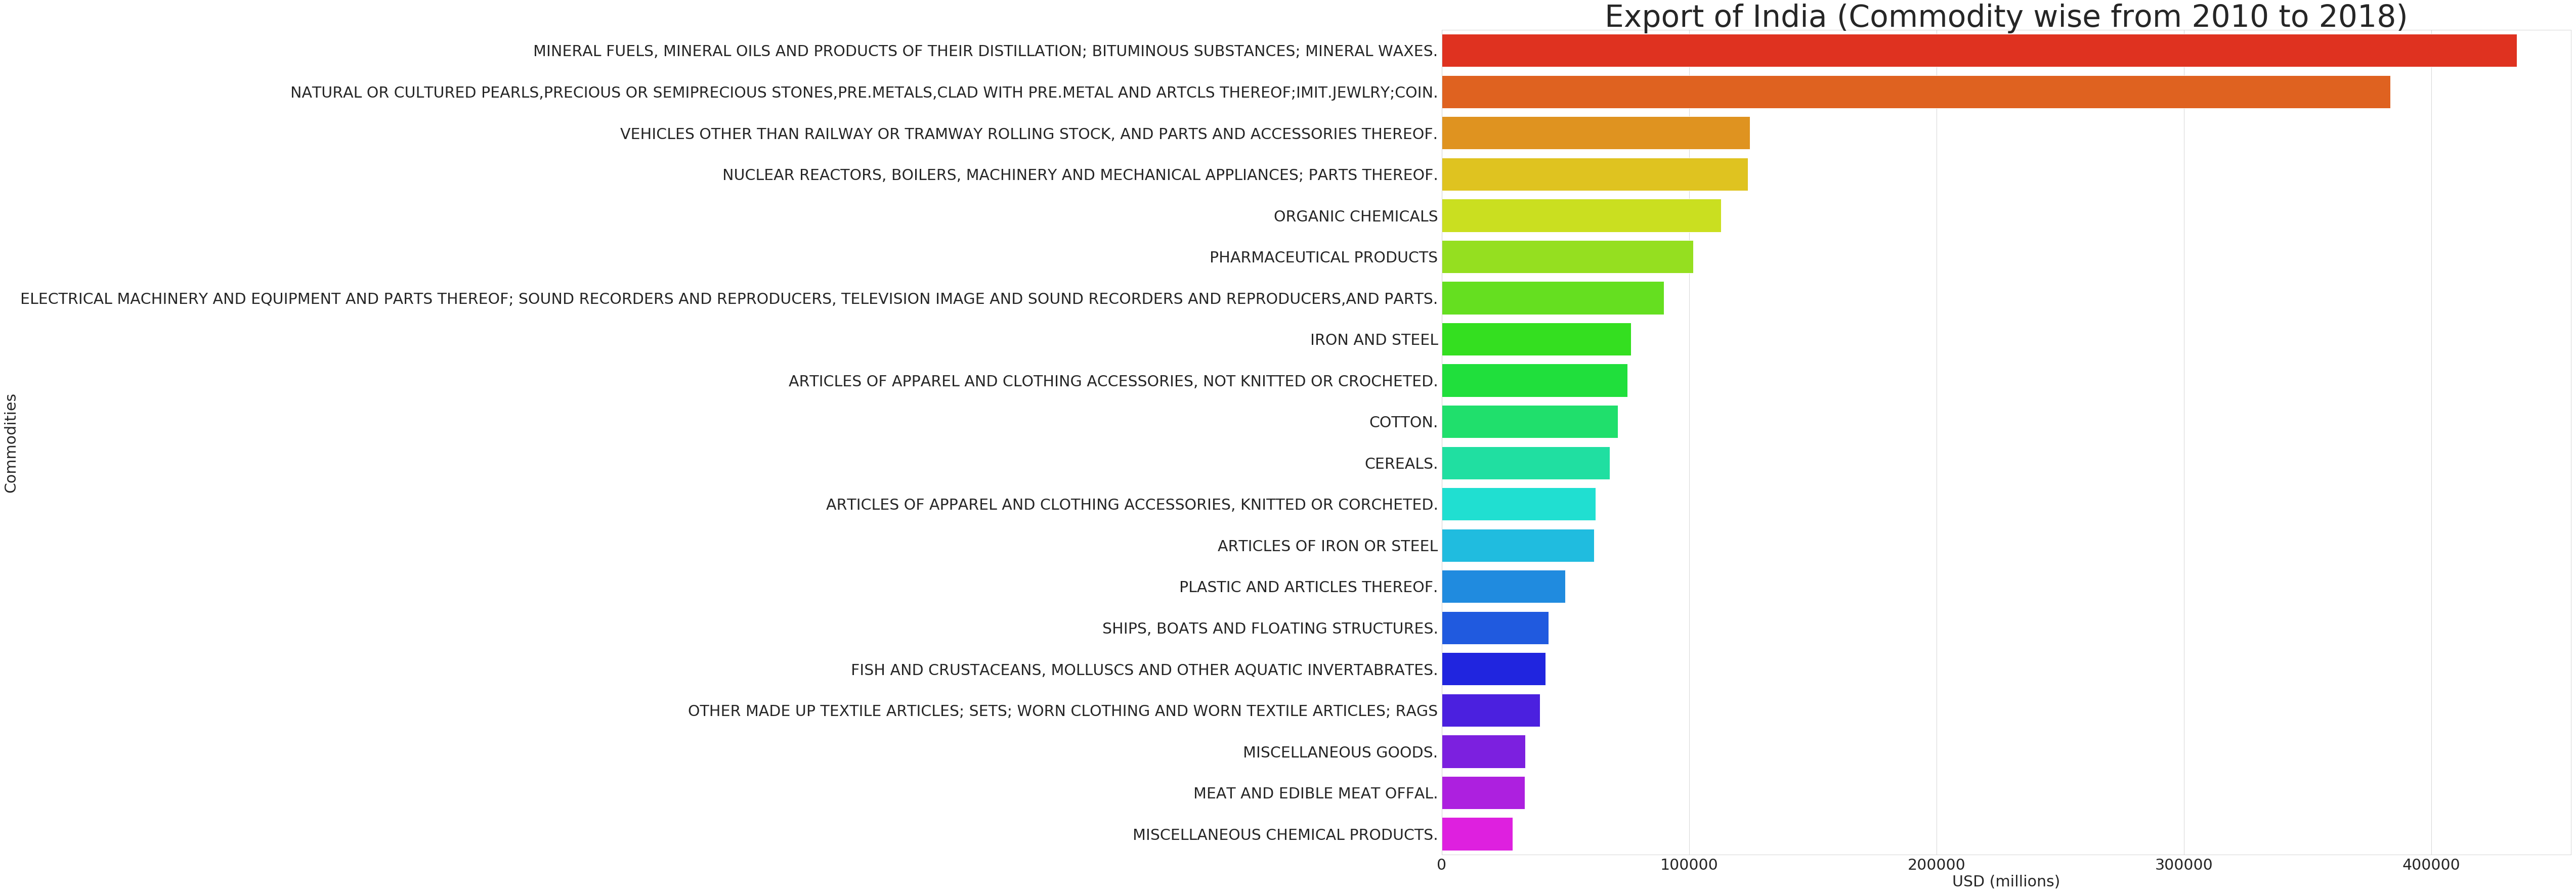

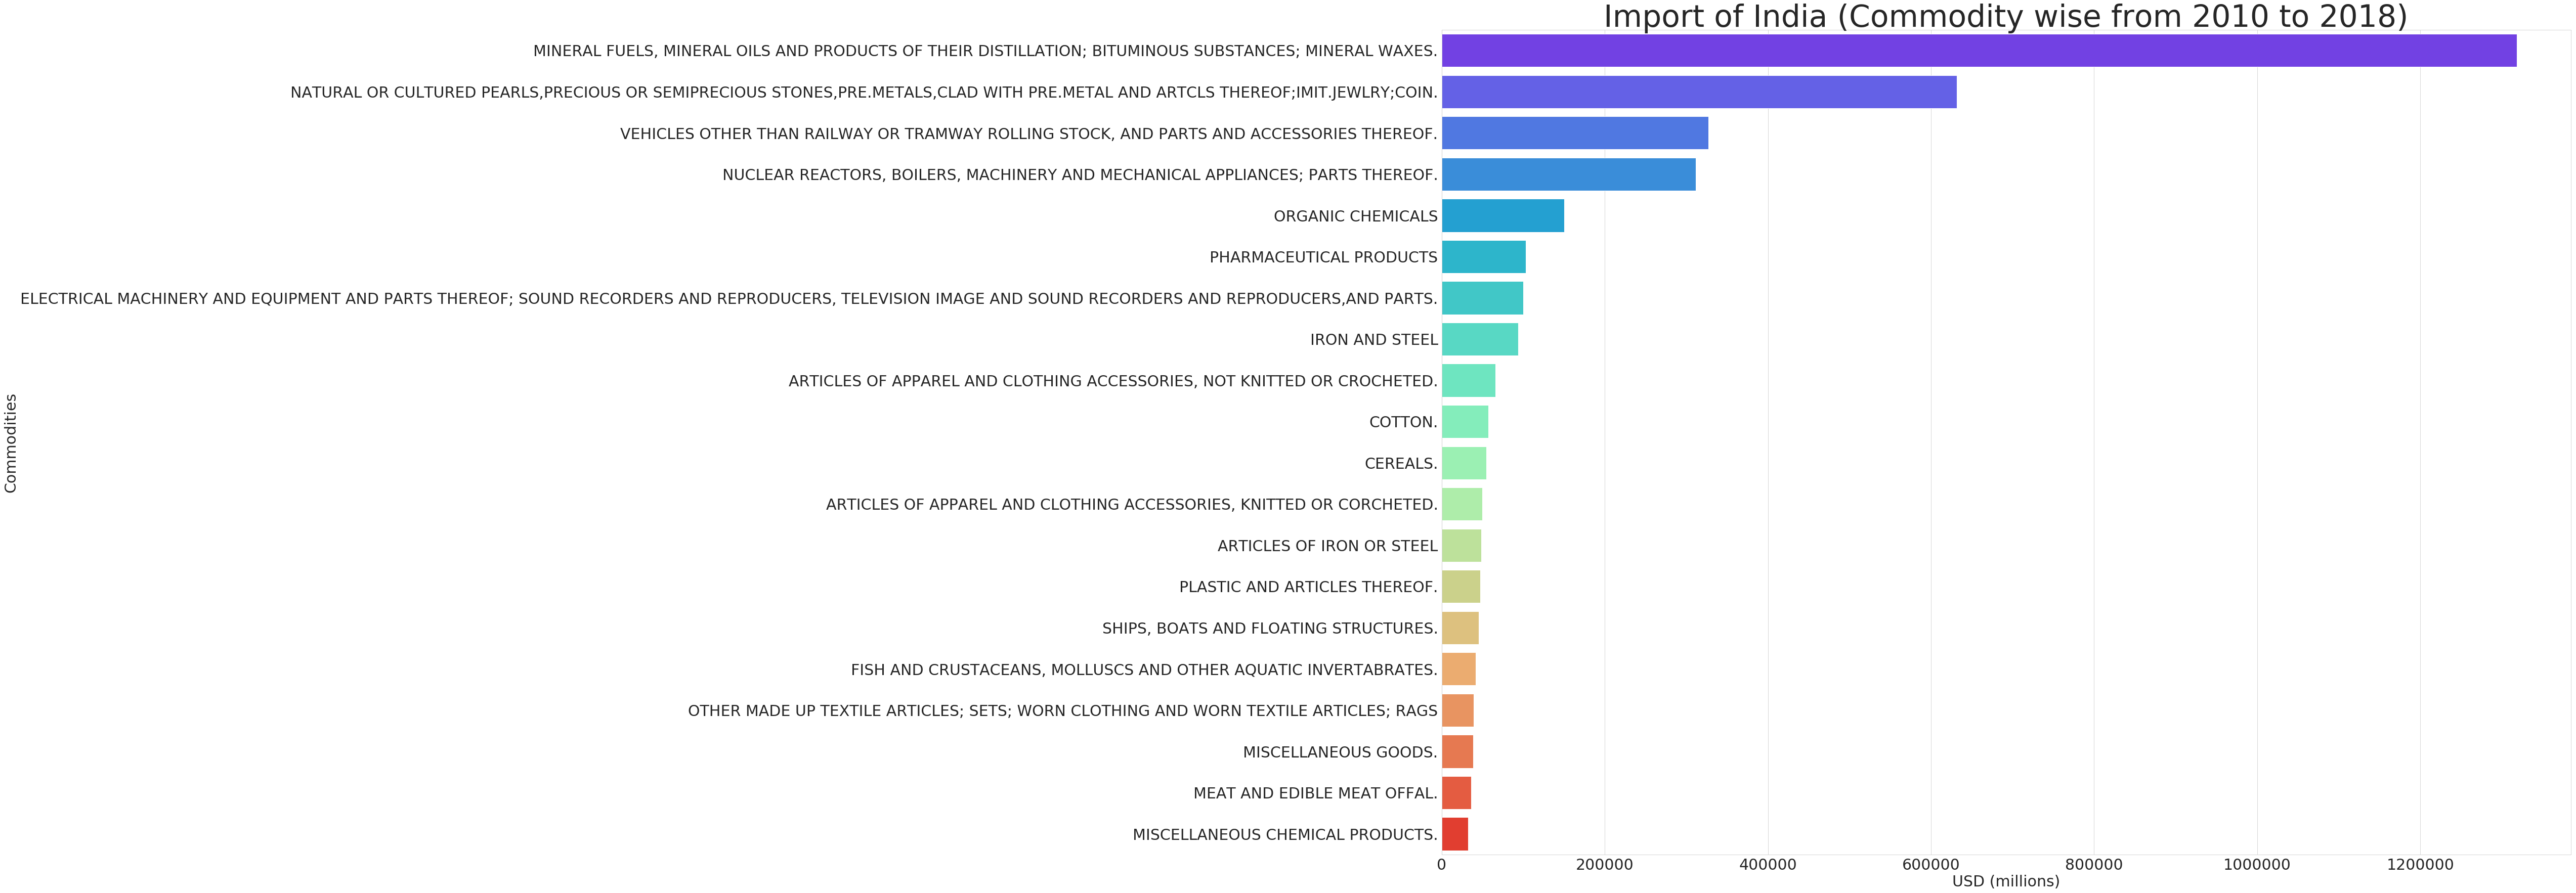

In [15]:
'''Visualization of Export/Import Commodity wise'''
def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sns.barplot(x, y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
    
bar_plot(exp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Export of India (Commodity wise from 2010 to 2018)', 'gist_rainbow')
bar_plot(imp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Import of India (Commodity wise from 2010 to 2018)', 'rainbow')

In [16]:
'''Create pivot table of export/import (commodity wise)'''
exp_comm_table = pd.pivot_table(df_export, values = 'value', index = 'Commodity', columns = 'year')
imp_comm_table = pd.pivot_table(df_import, values = 'value', index = 'Commodity', columns = 'year')
bold('**Commodity Composition of Exports**')
display(exp_comm_table.sample(n=5))
bold('**Commodity Composition of Imports**')
display(imp_comm_table.sample(n=5))

**Commodity Composition of Exports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1.019357,1.363491,1.589477,1.871695,1.957062,2.565632,2.368353,2.294571,2.758652
COTTON.,39.351477,50.122022,50.776591,55.144944,42.875722,41.315480,36.930838,39.138222,43.340385
"RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK AND PARTS THEREOF; RAILWAY OR TRAMWAY TRACK FIXTURES AND FITTINGS AND PARTS THEREOF; MECHANICAL",1.327073,1.285122,1.617841,1.855417,1.520449,1.208901,2.760714,3.650211,5.291053
TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.,7.002320,6.667200,7.276535,8.026032,7.100667,7.273778,7.489766,7.186462,7.322910
IRON AND STEEL,42.242130,45.613571,46.758497,52.107853,48.244667,32.118129,49.616114,63.888239,54.422737


**Commodity Composition of Imports**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
"DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED.",4.215682,7.002778,0.906757,1.204194,1.390000,1.220930,0.983514,1.043556,0.821000
MISCELLANEOUS CHEMICAL PRODUCTS.,28.577570,34.678241,38.700000,43.000787,42.195960,42.185146,43.522000,52.993365,50.172185
"COFFEE, TEA, MATE AND SPICES.",4.202162,5.577625,7.313919,6.772051,9.597368,9.552500,10.104000,10.366585,8.579048
FERTILISERS.,110.379464,156.285254,134.785818,102.921731,133.053542,110.964462,72.642712,83.402857,112.913729
EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.,18.162368,24.298851,29.093378,30.337353,38.725507,43.740964,39.501429,43.600000,45.919873


**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**

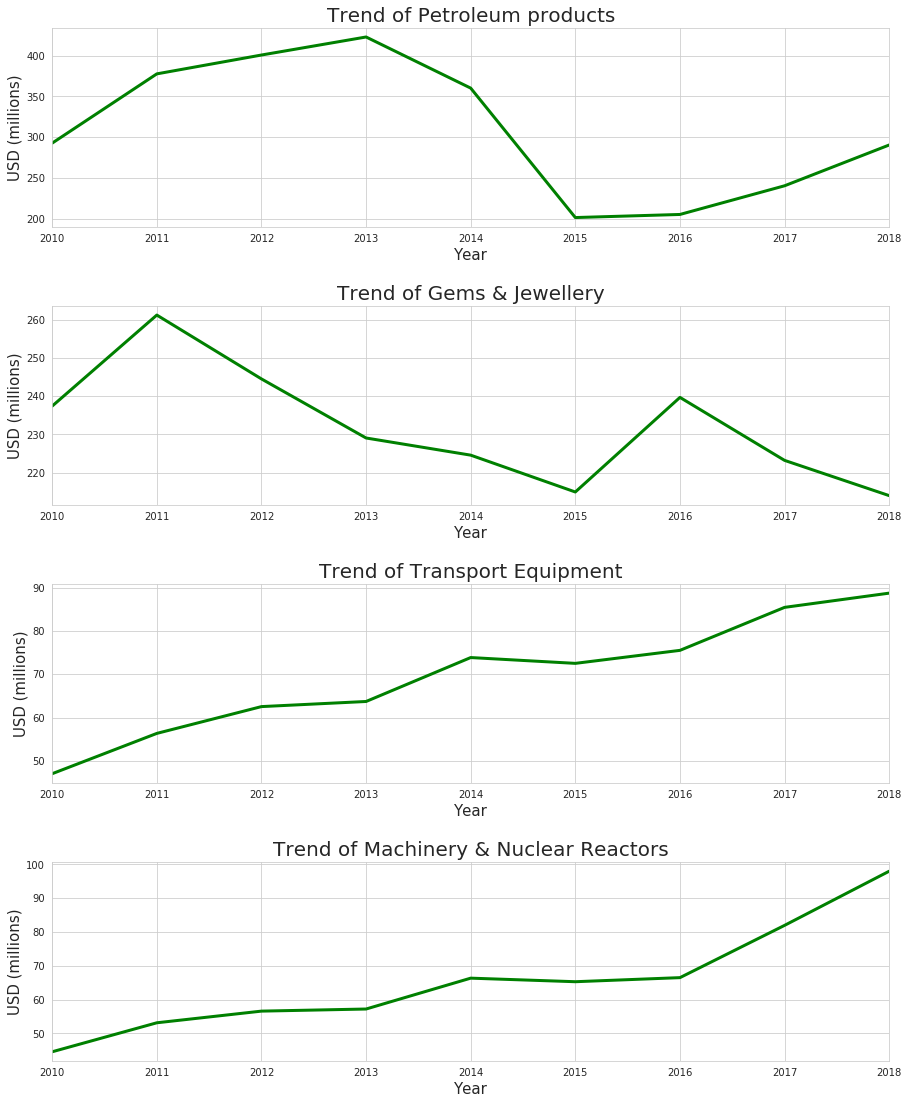

In [17]:
bold('**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = exp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='green', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = exp_comm_table.loc["VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF."].plot(color='green', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Transport Equipment', size = 20)


plt.subplot(414)
g3 = exp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='green', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

### ***<font color="blue" face="Constantia">Findings:</font>***
* The trend of petroleums products shows a perceptible shift between 2010 to 2018. The exports of petroleums products was significant decline from 2013 to 2015.
* The exports of  Gems & Jewellery also shows major decline.
* The exports of Transport Equipment and Machinery & Nuclear Reactors shows increasing trade.

**Trend of the Most Importing Goods(In Values) From 2010 to 2018**

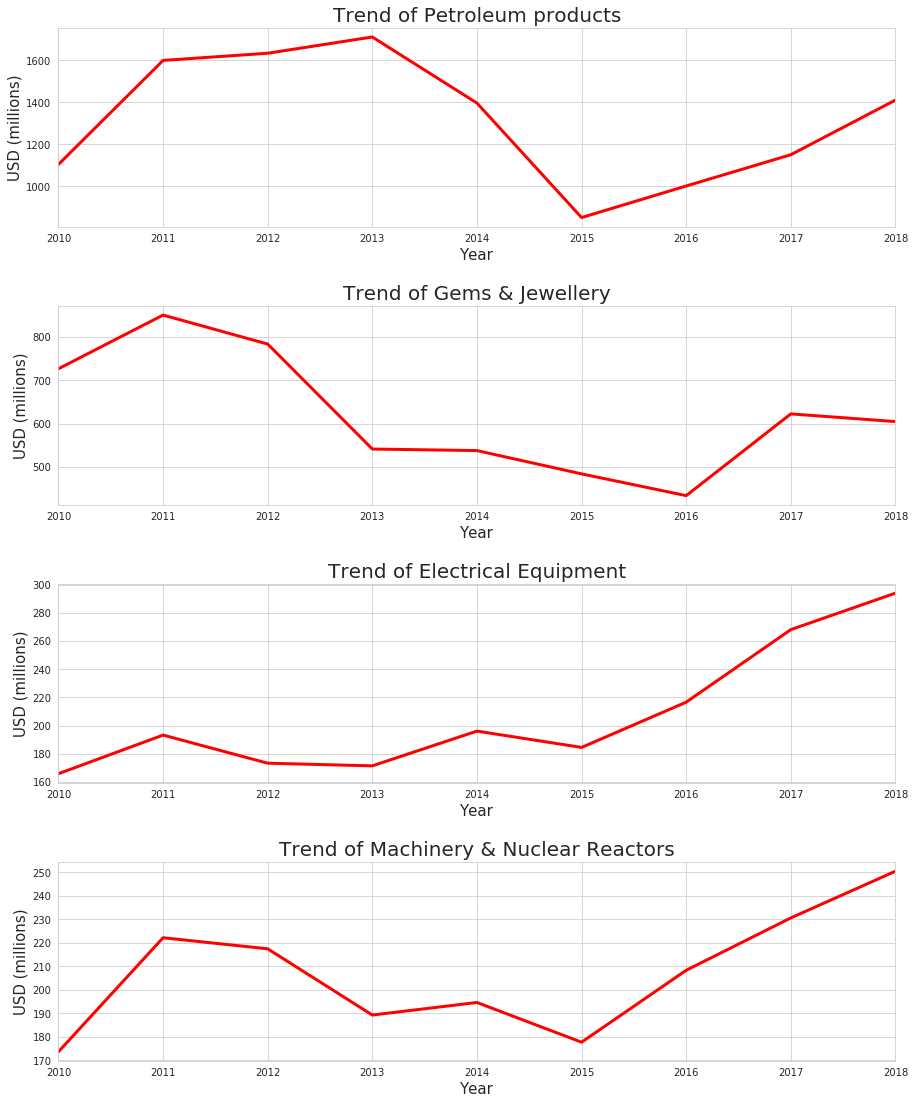

In [18]:
bold('**Trend of the Most Importing Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='red', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = imp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='red', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = imp_comm_table.loc["ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS."].plot(color='red', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Electrical Equipment', size = 20)


plt.subplot(414)
g3 = imp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='red', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

### ***<font color="blue" face="Constantia">Findings:</font>***
* The imports of  petroleums products was significant decline from 2013 to 2015. Afterwards it showing inceasing trend.
* The imports of Gems and Jewellaries showing decreasing trend.
* From 2010 to 2015, imports of  Electrical Equipment and Machinery & Nuclear Reactors was low but after 2015 its shows significant increase.

### <font color="blue" face="Arial Black">4.3 Country Wise Analysis</font>

In [19]:
'''Country export/Import count'''
print('Total number of country Export to:', df_export['country'].nunique())
print('Total number of country Import from:', df_import['country'].nunique())

Total number of country Export to: 248
Total number of country Import from: 241


In [20]:
'''Coverting dataset in Country wise'''
exp_country = df_export.groupby('country').agg({'value':'sum'})
exp_country = exp_country.rename(columns={'value': 'Export'})
exp_country = exp_country.sort_values(by = 'Export', ascending = False)
exp_country = exp_country[:20]

imp_country = df_import.groupby('country').agg({'value':'sum'})
imp_country = imp_country.rename(columns={'value': 'Import'})
imp_country = imp_country.sort_values(by = 'Import', ascending = False)
imp_country = imp_country[:20]

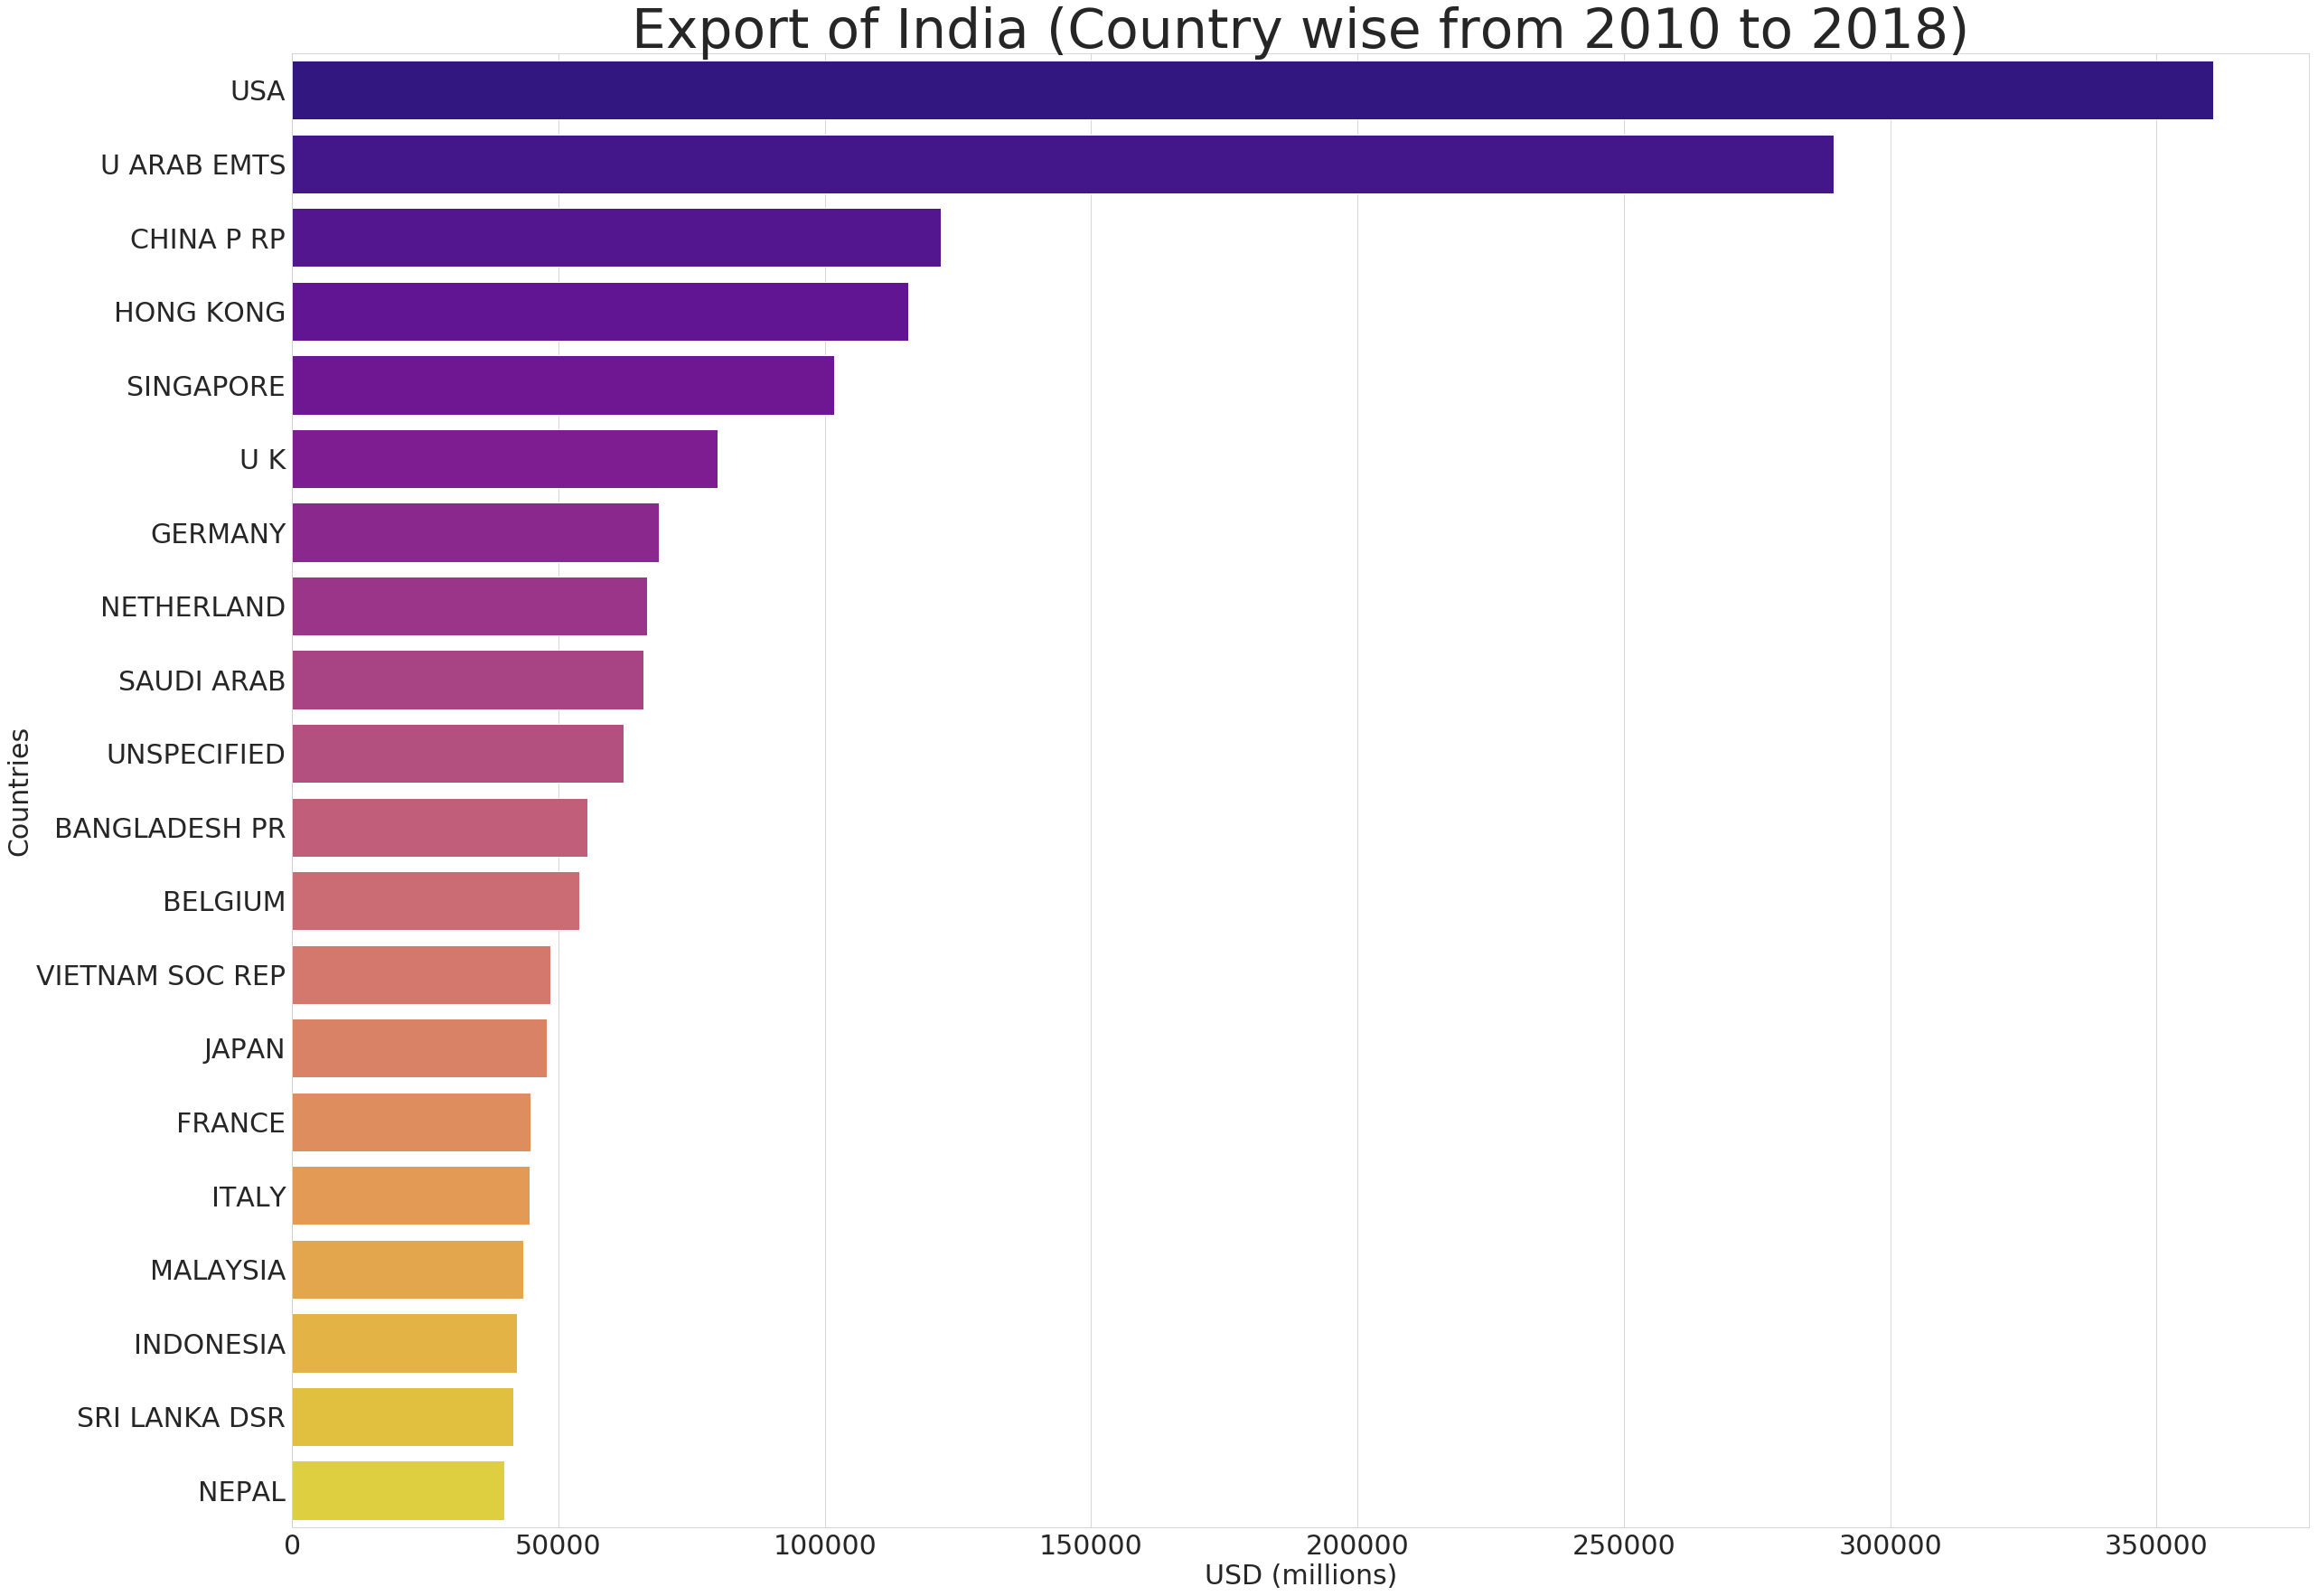

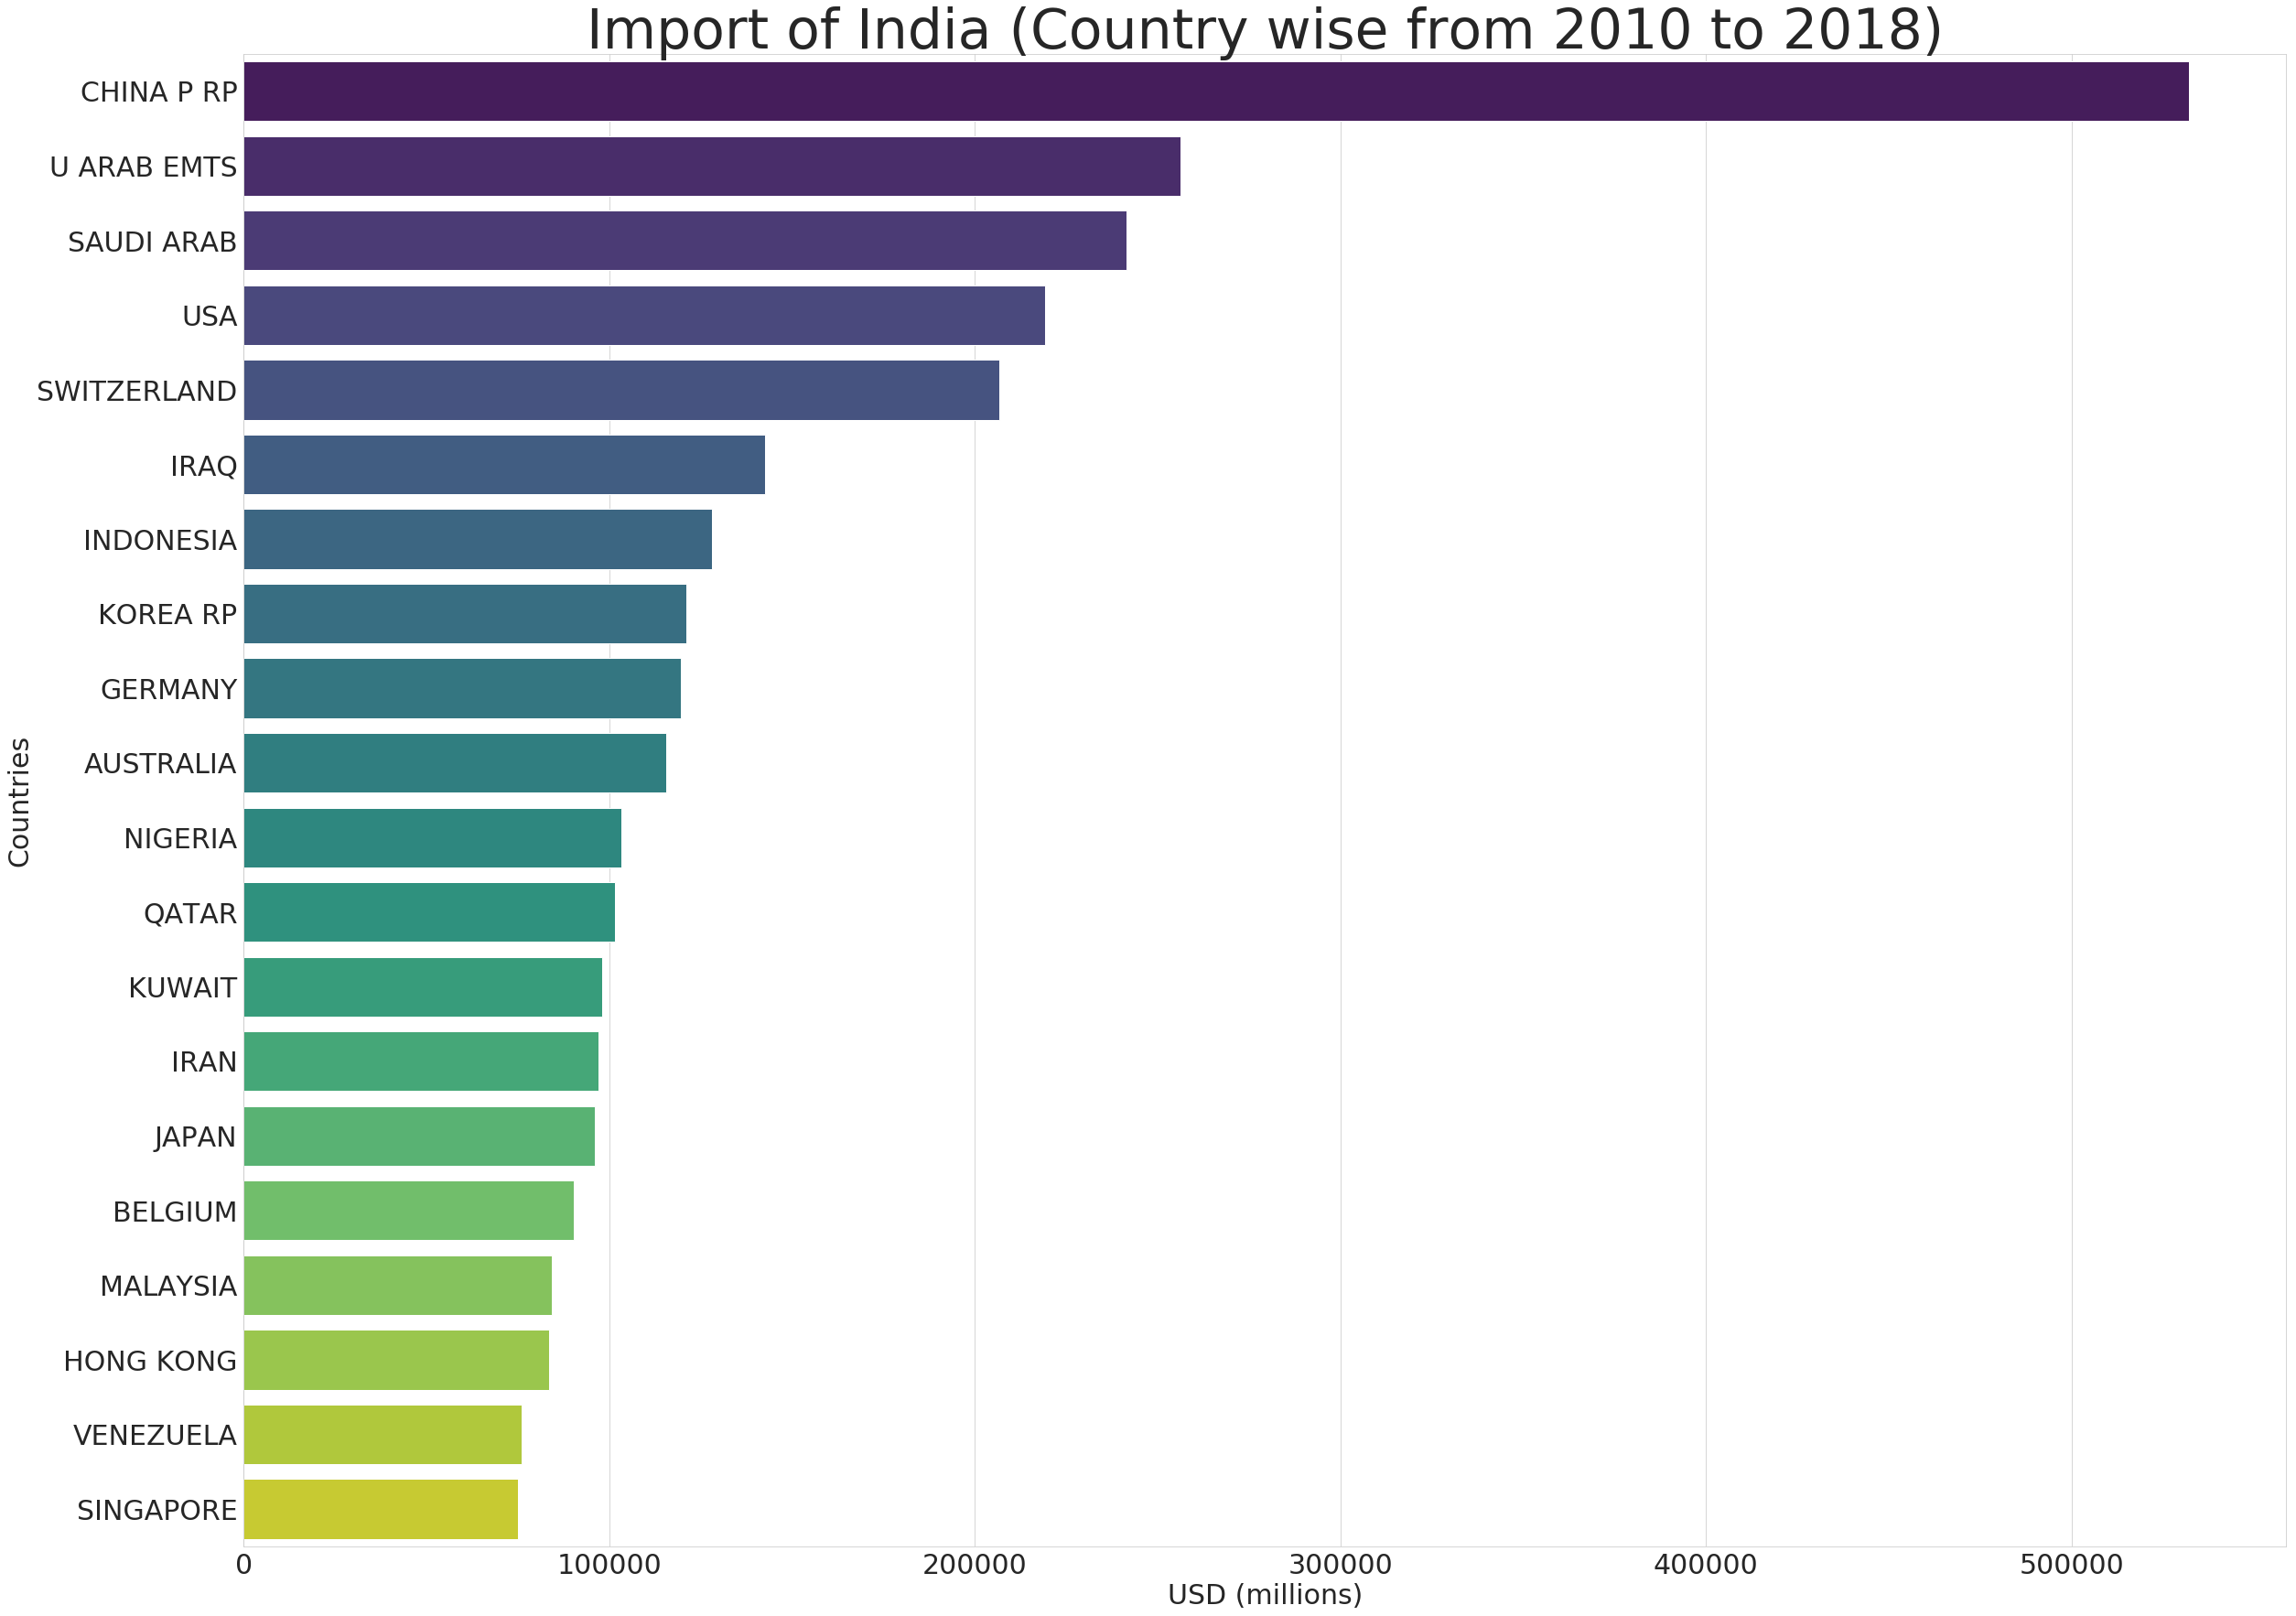

In [21]:
'''Visualization of Export/Import Country wise'''
bar_plot(exp_country.Export, exp_country.index, 'USD (millions)', 'Countries', 'Export of India (Country wise from 2010 to 2018)', 'plasma')
bar_plot(imp_country.Import, imp_country.index, 'USD (millions)', 'Countries', 'Import of India (Country wise from 2010 to 2018)', 'viridis')

### ***<font color="blue" face="Constantia">Findings:</font>***
* China has biggest market in india followed by UAE, Saudi Arabia and USA
* For India, USA is biggest importer followed by UAE and China Republic.

In [22]:
'''Calculating trade deficit'''
total_country = pd.concat([exp_country, imp_country], axis = 1)
total_country['Trade Deficit'] = exp_country.Export - imp_country.Import
total_country = total_country.sort_values(by = 'Trade Deficit', ascending = False)
total_country = total_country[:11]

bold('**Direction of Foreign Trade Export/Import and Trade Balance of India**')
display(total_country)
bold('**Descriptive statistics**')
display(total_country.describe())

**Direction of Foreign Trade Export/Import and Trade Balance of India**

,Export,Import,Trade Deficit
USA,360609.57,219276.66,141332.91
U ARAB EMTS,289374.88,256286.08,33088.80
HONG KONG,115693.35,83542.74,32150.61
SINGAPORE,101679.70,75043.09,26636.61
BELGIUM,53969.10,90213.86,-36244.76
MALAYSIA,43377.70,84142.18,-40764.48
JAPAN,47822.15,96004.66,-48182.51
GERMANY,68855.45,119664.64,-50809.19
INDONESIA,42148.84,128164.40,-86015.56
SAUDI ARAB,65995.99,241554.99,-175559.00


**Descriptive statistics**

,Export,Import,Trade Deficit
count,11.000000,11.000000,11.000000
mean,119212.066364,175097.346364,-55885.280000
std,106754.450973,136333.624619,142464.448162
min,42148.840000,75043.090000,-410371.510000
25%,50895.625000,87178.020000,-68412.375000
50%,68855.450000,119664.640000,-40764.480000
75%,118749.675000,230415.825000,29393.610000
max,360609.570000,532177.510000,141332.910000


### ***<font color="blue" face="Constantia">Findings:</font>***
* India have trade surplus with USA, Hong Kong, and Singapore.
* India have huge trade deficit with China, Suadi Arab and Indonesia etc. 

In [23]:
'''Visualization of Export/Import and Trade Deficit'''
trace1 = go.Bar(
                x = total_country.index,
                y = total_country.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_country.index,
                y = total_country.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)
# create trace3
trace3 = go.Bar(
                x = total_country.index,
                y = total_country['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018(Country Wise)' , xaxis = dict(title = 'Country'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

In [24]:
'''Create pivot table of export/import (country wise)'''
exp_country_table = pd.pivot_table(df_export, values = 'value', index = 'country', columns = 'year')
imp_country_table = pd.pivot_table(df_import, values = 'value', index = 'country', columns = 'year')
bold('**Direction of Foreign Trade Export in India**')
display(exp_country_table.sample(n=5))
bold('**Direction of Foreign Trade Import in India**')
display(imp_country_table.sample(n=5))

**Direction of Foreign Trade Export in India**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
MOZAMBIQUE,7.289759,6.503293,11.506552,14.618023,25.252439,15.331235,12.782785,10.849036,13.585063
BRAZIL,45.727386,66.316897,67.204111,65.321765,67.768750,31.178353,28.239176,35.210690,40.863548
ZAMBIA,1.479000,2.602963,2.962805,4.386047,4.414819,3.590602,2.856024,3.379540,3.543333
COLOMBIA,7.195128,11.295570,11.400125,12.137711,13.642346,10.948148,9.805250,11.313614,12.985116
NAURU RP,0.025000,0.022222,0.000000,0.020000,0.020000,0.000000,0.360000,0.096429,0.052000


**Direction of Foreign Trade Import in India**

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
JORDAN,19.498333,28.520000,20.939556,13.570,19.948837,22.450263,20.706000,20.101224,19.932321
MACEDONIA,0.168333,2.461667,2.294000,1.326,0.565625,0.590833,1.418824,3.327857,1.415294
CROATIA,1.220000,0.649459,0.547576,0.278,0.795278,1.028286,0.617317,0.744419,0.827234
C AFRI REP,0.156000,0.398000,0.497500,0.184,0.315000,0.415000,0.063333,2.470000,0.505000
BARBADOS,0.025000,0.070909,0.018000,0.030,0.056667,0.026667,0.028333,0.028571,0.173000


**Trend of the Direction of Foreign Trade Export in India From 2010 to 2018**

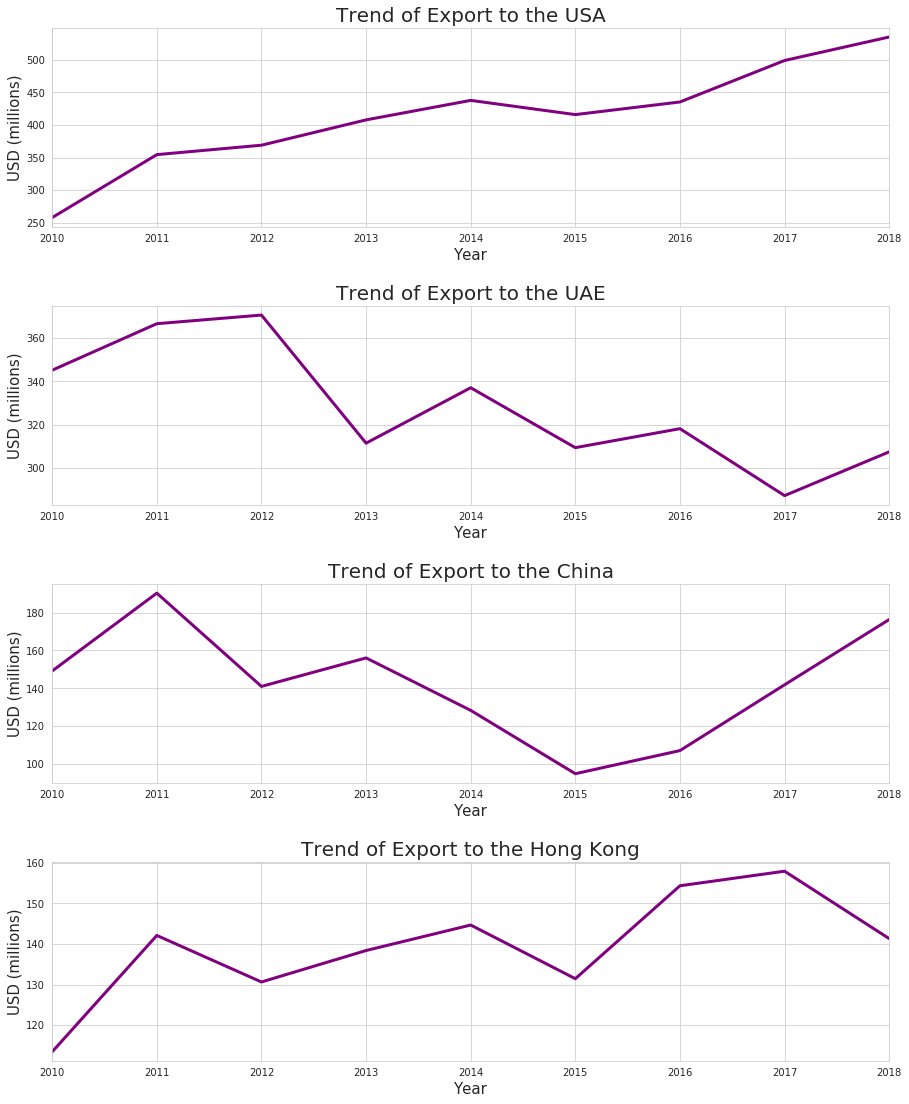

In [25]:
bold('**Trend of the Direction of Foreign Trade Export in India From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_country_table.loc["USA"].plot(color='purple', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Export to the USA', size = 20)

plt.subplot(412)
g1 = exp_country_table.loc["U ARAB EMTS"].plot(color='purple', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Export to the UAE', size = 20)

plt.subplot(413)
g2 = exp_country_table.loc["CHINA P RP"].plot(color='purple', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Export to the China', size = 20)


plt.subplot(414)
g3 = exp_country_table.loc["HONG KONG"].plot(color='purple', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Export to the Hong Kong', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

### ***<font color="blue" face="Constantia">Findings:</font>***
* Every year India increase her export to the USA, and the USA used to be the major trading partners of India.
* Export to the UAE shows decreasing trend from 2012 to 2017.
* Export to the China also shows decreasing trend from 2011 to 2015, afterwards its start increasing.
* Export to the Hong Kong shows a perceptible shift during the year.

**Trend of the Direction of Foreign Trade Import in India From 2010 to 2018**

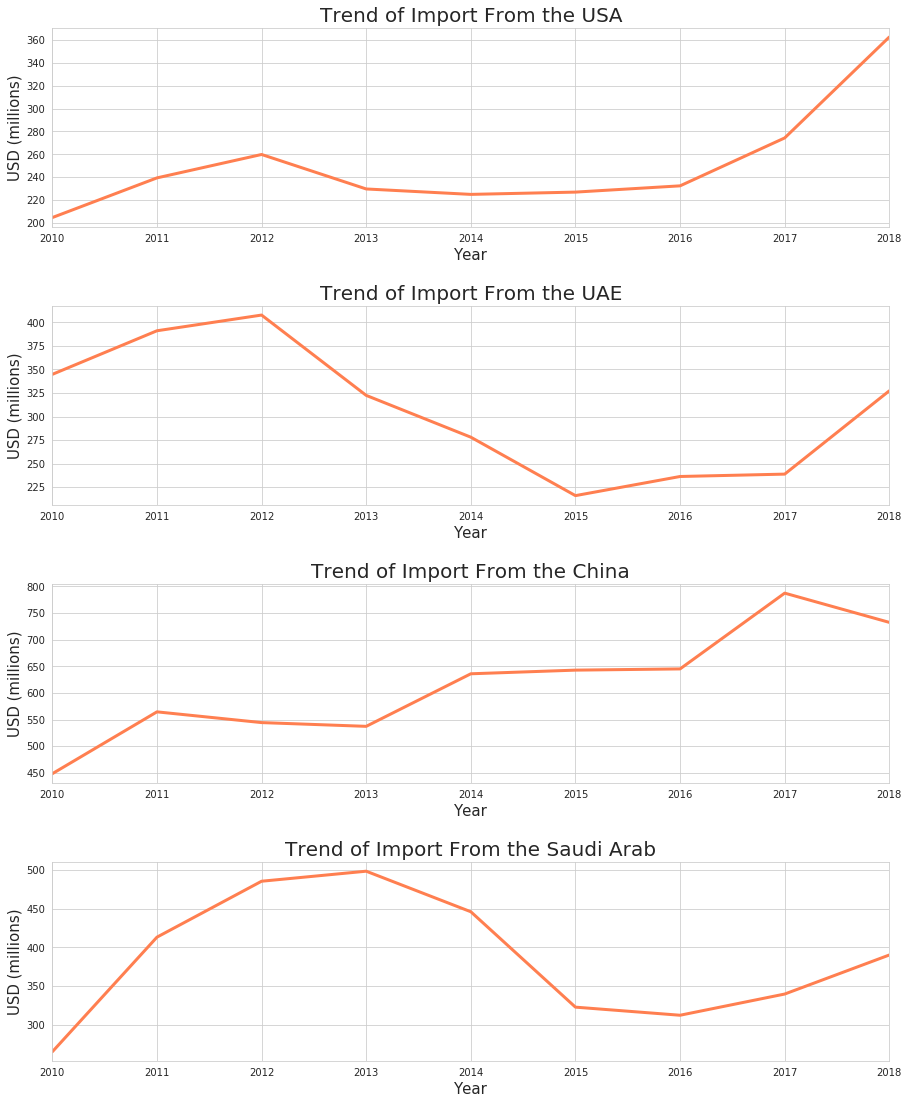

In [26]:
bold('**Trend of the Direction of Foreign Trade Import in India From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_country_table.loc["USA"].plot(color='coral', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Import From the USA', size = 20)

plt.subplot(412)
g1 = imp_country_table.loc["U ARAB EMTS"].plot(color='coral', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Import From the UAE', size = 20)

plt.subplot(413)
g2 = imp_country_table.loc["CHINA P RP"].plot(color='coral', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Import From the China', size = 20)


plt.subplot(414)
g3 = imp_country_table.loc["SAUDI ARAB"].plot(color='coral', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Import From the Saudi Arab', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

### ***<font color="blue" face="Constantia">Findings:</font>***
* From 2010 to 2016, imports from the USA was low, after 2016 impots starts increasing.
* Imports from the UAE and Suadi Arab showing same trend. Imports falls during 2012 to 2015, after 2015 its starts increasing.
* Imports from the china is continueos increasing and the China used to be the major trading partners of India.

### <font color="blue" face="Arial Black">4.4 HS Code Wise Analysis</font>
For HScode Wise Analysis, we are creating dataframe according to Hs Codes list and Section, check more detail on HS code above. 

**List Of indian HS Classification is based on HS Code used in actual Shipment Data:**  http://www.cybex.in/HS-Codes/Default.aspx

In [27]:
''' creating a new dataframe on Sections of HSCode'''
HSCode = pd.DataFrame() 
HSCode['Start']=[1,6,15,16,25,28,39,41,44,47,50,64,68,71,72,84,86,90,93,94,97]
HSCode['End']=[5,14,15,24,27,38,40,43,46,49,63,67,70,71,83,85,89,92,93,96,99]
HSCode['Sections Name']=['Animals & Animal Products',
'Vegetable Products',
'Animal Or Vegetable Fats',
'Prepared Foodstuffs',
'Mineral Products',
'Chemical Products',
'Plastics & Rubber',
'Hides & Skins',
'Wood & Wood Products',
'Wood Pulp Products',
'Textiles & Textile Articles',
'Footwear, Headgear',
'Articles Of Stone, Plaster, Cement, Asbestos',
'Pearls, Precious Or Semi-Precious Stones, Metals',
'Base Metals & Articles Thereof',
'Machinery & Mechanical Appliances',
'Transportation Equipment',
'Instruments - Measuring, Musical',
'Arms & Ammunition',
'Miscellaneous',
'Works Of Art',]
HSCode.index += 1
HSCode.index.name = 'Section'

In [28]:
bold('**List Of indian HS Classification is based on the HS Code:**')
display(HSCode)

**List Of indian HS Classification is based on the HS Code:**

,Start,End,Sections Name
Section,,,
1,1,5,Animals & Animal Products
2,6,14,Vegetable Products
3,15,15,Animal Or Vegetable Fats
4,16,24,Prepared Foodstuffs
5,25,27,Mineral Products
6,28,38,Chemical Products
7,39,40,Plastics & Rubber
8,41,43,Hides & Skins
9,44,46,Wood & Wood Products


In [29]:
df_export['Sections Name'] = df_export['HSCode']
df_import['Sections Name'] = df_import['HSCode']
for i in range(1,22):
    df_export.loc[(df_export['Sections Name'] >= HSCode['Start'][i]) & (df_export['Sections Name'] <= HSCode['End'][i]),'Sections Name']=i
    df_import.loc[(df_import['Sections Name'] >= HSCode['Start'][i]) & (df_import['Sections Name'] <= HSCode['End'][i]),'Sections Name']=i

In [30]:
exp_hscode = df_export.groupby(['Sections Name']).agg({'value':'sum'})
exp_hscode['Sections Name'] = HSCode['Sections Name']
imp_hscode = df_import.groupby(['Sections Name']).agg({'value':'sum'})
imp_hscode['Sections Name'] = HSCode['Sections Name']

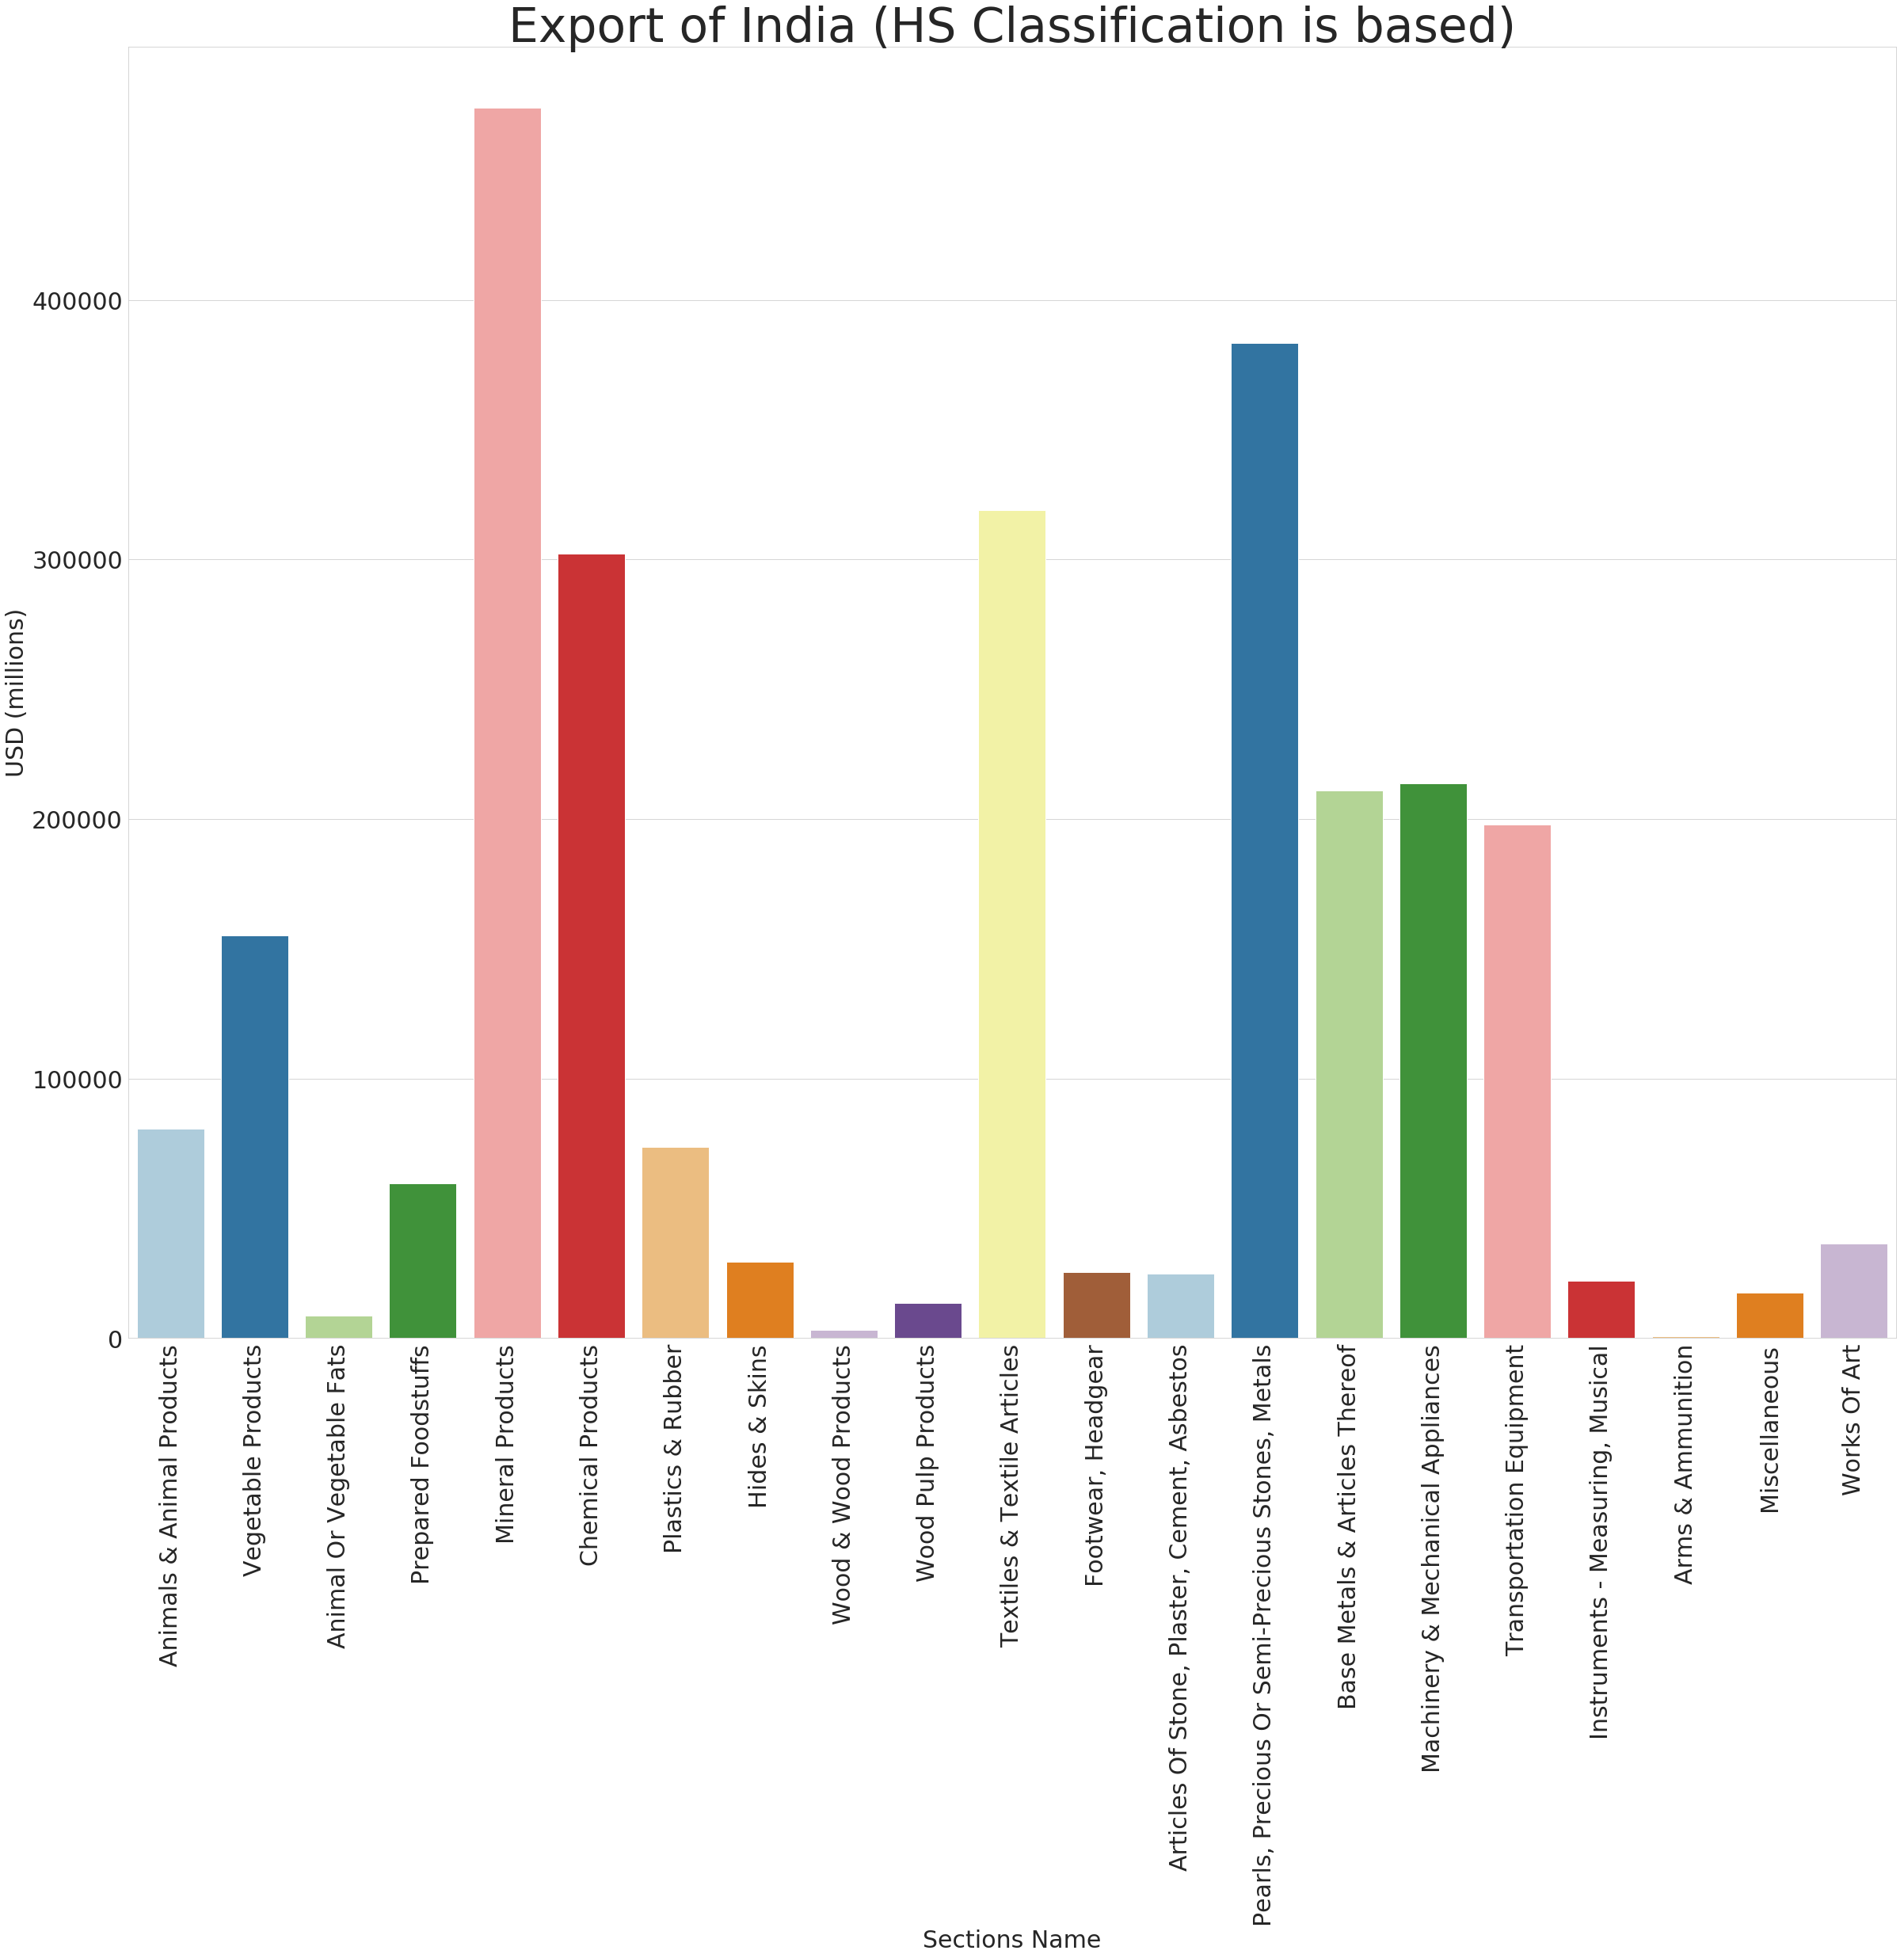

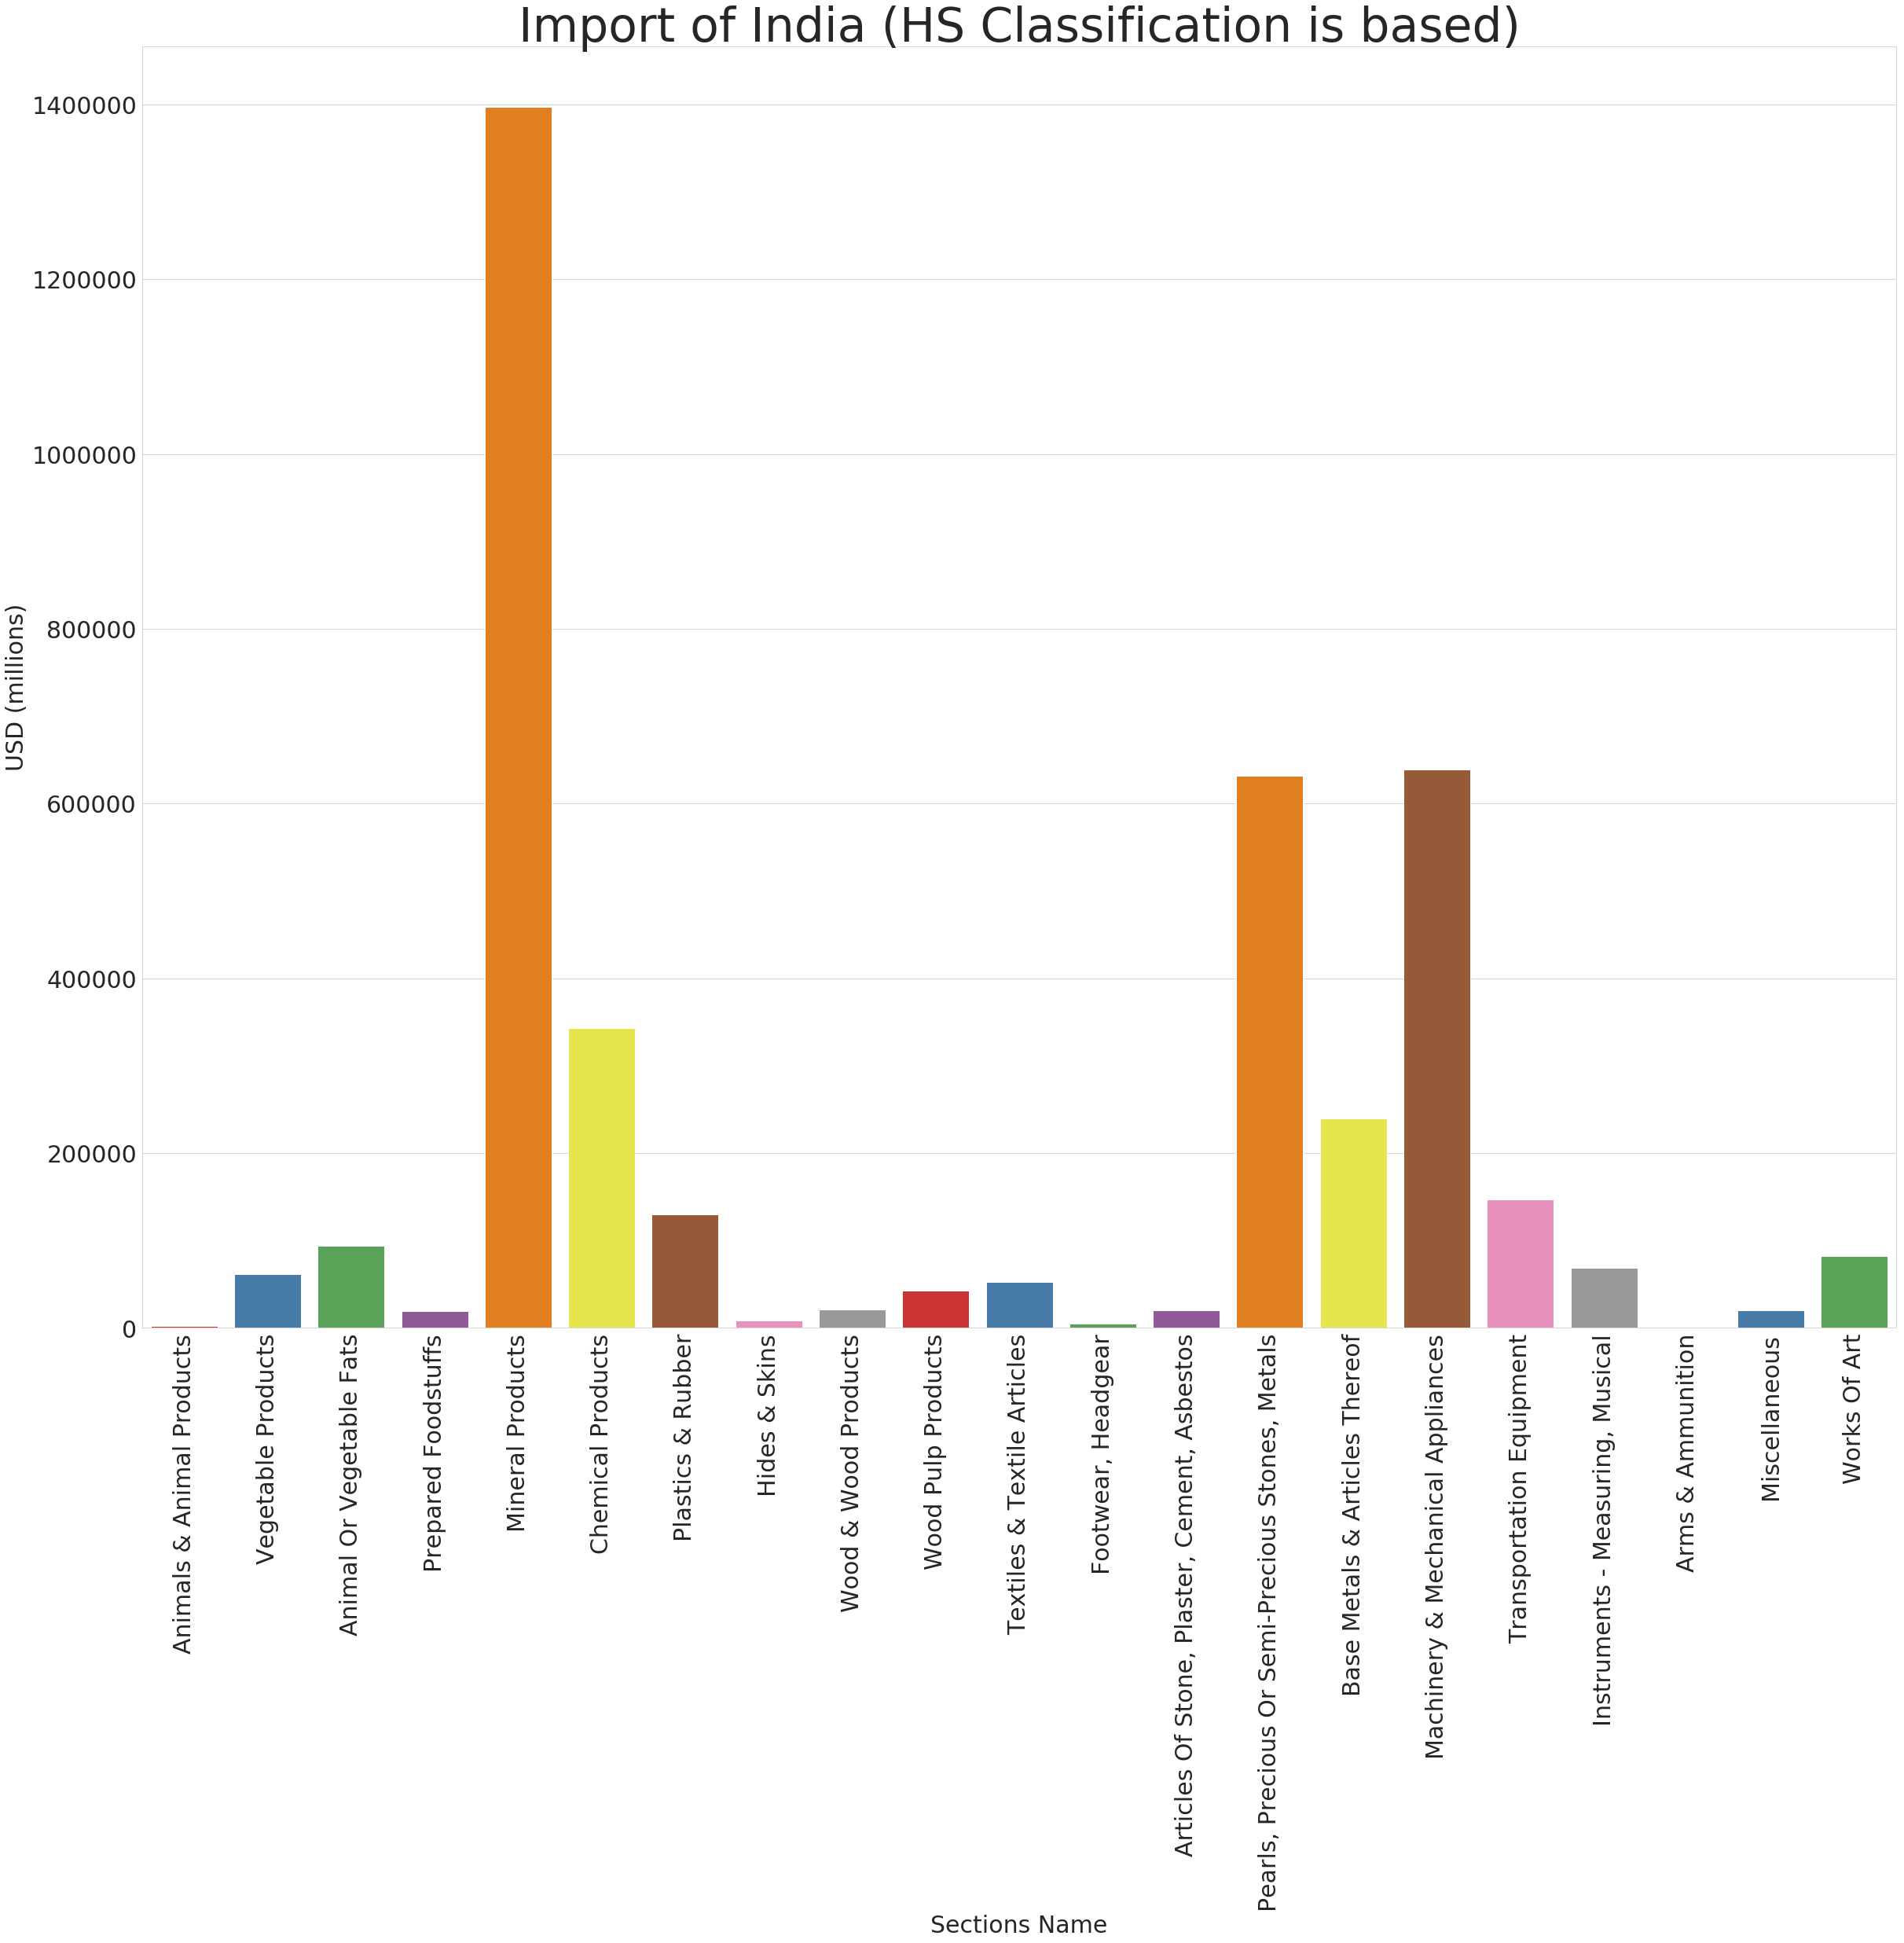

In [31]:
'''Visualization of Export/Import HS Classification is based'''
def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sns.barplot(x, y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(rotation = 90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()

bar_plot(exp_hscode['Sections Name'], exp_hscode.value, 'Sections Name', 'USD (millions)', 'Export of India (HS Classification is based)', 'Paired')
bar_plot(imp_hscode['Sections Name'], imp_hscode.value, 'Sections Name', 'USD (millions)', 'Import of India (HS Classification is based)', 'Set1')

### ***<font color="blue" face="Constantia">Findings:</font>***
* Above two graphs giving more clear picture about the export/import of goods.
* Its seems that most exporting goods are Mineral Products followed by Pearls, Precious Or Semi-Precious Stones, Metals and Chemical products etc.
* The most importing goods are Minerial Products followed by Pearls, Precious Or Semi-Precious Stones, Metals, and Machinery & Mechanical Appliances etc.

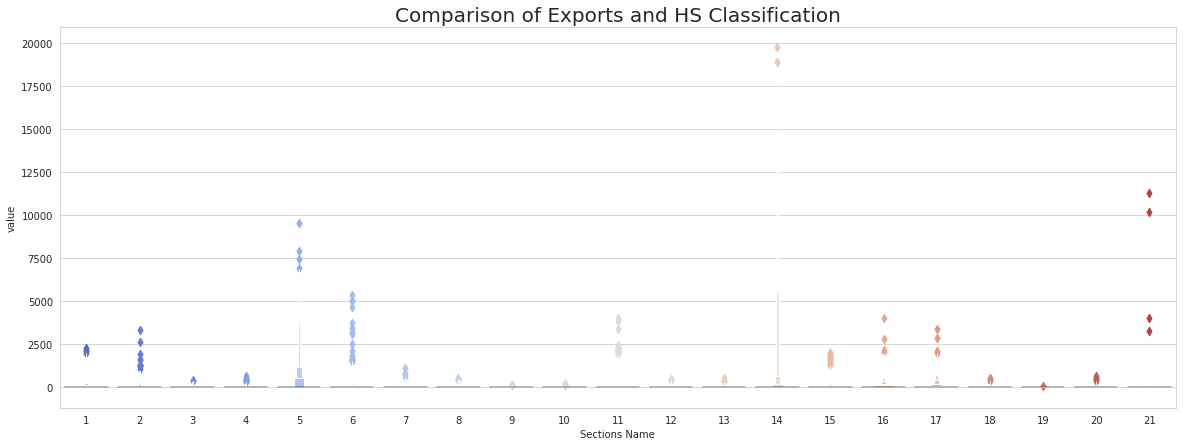

In [32]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df_export['Sections Name'], df_export['value'], palette = 'coolwarm')
plt.title('Comparison of Exports and HS Classification', fontsize = 20)
plt.show()

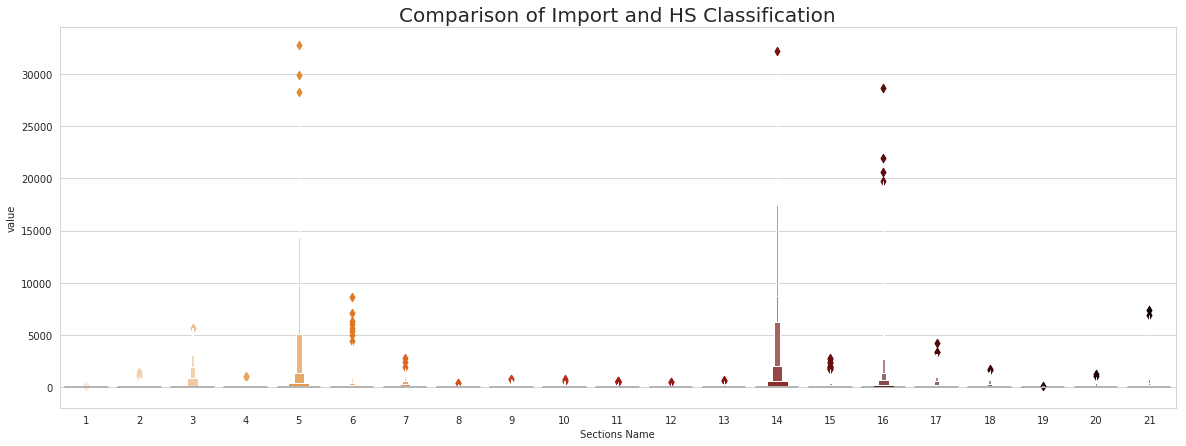

In [33]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df_import['Sections Name'], df_import['value'], palette = 'gist_heat_r')
plt.title('Comparison of Import and HS Classification', fontsize = 20)
plt.show()

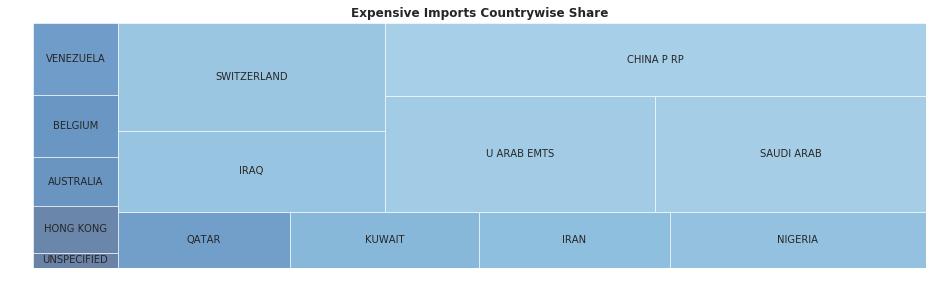

In [34]:
'Top expensive import and export '
expensive_import = df_import.sort_values(by='value',  ascending=False).head(100)

import squarify
import matplotlib
temp1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
temp1 = temp1.sort_values(by='value')

norm = matplotlib.colors.Normalize(vmin=min(expensive_import.value), vmax=max(expensive_import.value))
colors = [matplotlib.cm.Blues(norm(value)) for value in expensive_import.value]

value=np.array(temp1)
country=temp1.index
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=value, label=country, color = colors, alpha=.6)
plt.title("Expensive Imports Countrywise Share", fontweight="bold")
plt.axis('off')
plt.show()

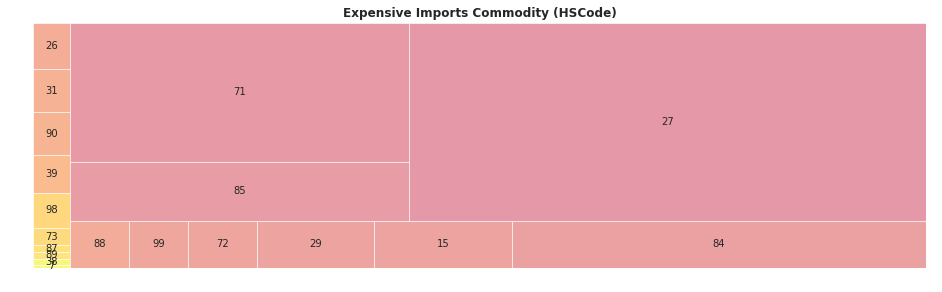

In [35]:
expensive_import = df_import.sort_values(by='value',  ascending=False).head(500)
temp2 = expensive_import.groupby(['HSCode']).agg({'value': 'sum'})
temp2 = temp2.sort_values(by='value')

norm = matplotlib.colors.Normalize(vmin=min(expensive_import.value), vmax=max(expensive_import.value))
colors = [matplotlib.cm.plasma(norm(value)) for value in expensive_import.value]

value=np.array(temp2)
country=temp2.index
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(sizes=value, label=country, color = colors, alpha=.6)
plt.title("Expensive Imports Commodity (HSCode)", fontweight="bold")
plt.axis('off')
plt.show()

In [36]:
import warnings
warnings.filterwarnings('ignore')

export_map = pd.DataFrame(df_export.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(export_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'algae',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Export to Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

In [37]:
import_map = pd.DataFrame(df_import.groupby(['country'])['value'].sum().reset_index())
count = pd.DataFrame(import_map.groupby('country')['value'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'amp',
            locationmode = 'country names',
            locations = count['country'],
            text = count['country'],
            z = count['value'],
            reversescale=True)]

layout = go.Layout(title = 'India Import from Other Country')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

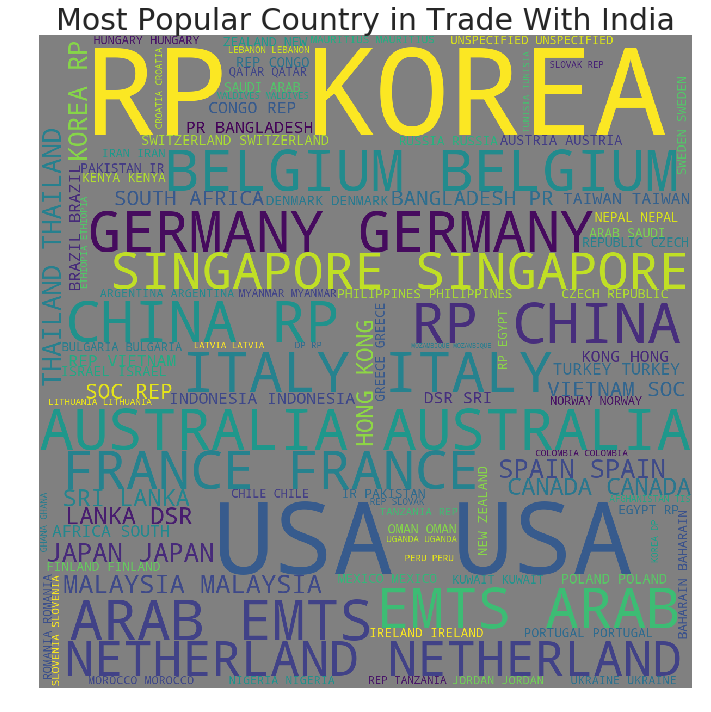

In [38]:
df_final_trade = pd.concat([df_export, df_import])
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'gray', width = 1200,  height = 1200, max_words = 100).generate(' '.join(df_final_trade['country']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Country in Trade With India',fontsize = 30)
plt.show()

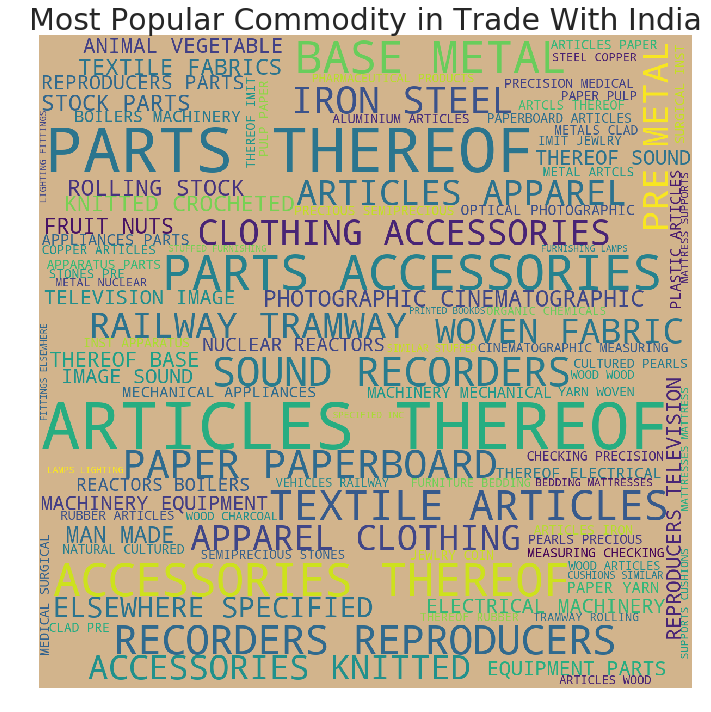

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'tan', width = 1200,  height = 1200, max_words = 100).generate(' '.join(df_final_trade['Commodity']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Commodity in Trade With India',fontsize = 30)
plt.show()

## <font color="red" face="Constantia">Give me your feedback and if you find my kernel helpful please UPVOTE will be appreciated.</font>
## --Thank You for Reading